In [1]:
import glob
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


#Tumor

In [2]:
df_tumor_1 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_1_coding.csv')
df_tumor_1

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,3.486740,-9.965784,5.172844,1.602267,2.895497,2.559272,2.707149,3.671350,2.969547,2.785697,...,-9.965784,-6.717857,-1.311148,-9.965784,-9.965784,-9.965784,-9.965784,-8.532825,-2.334971,1
1,3.563549,-9.965784,5.505129,0.720629,1.305737,3.598722,3.788393,3.856219,3.300753,3.142332,...,-9.965784,-9.965784,-1.479553,-9.965784,-9.965784,-9.965784,-9.965784,-5.869860,-2.107182,1
2,3.414636,-9.965784,4.876036,0.443076,0.660746,-0.314912,0.776188,3.013444,5.734376,3.168385,...,-9.965784,-7.333516,-1.372206,-9.965784,-9.965784,-9.965784,-9.965784,-8.333516,-0.057392,1
3,4.024515,-3.910502,4.125254,1.106549,-0.166341,2.647752,4.162838,4.337154,1.217479,3.487358,...,-9.965784,-9.965784,-1.236843,-3.480357,-9.965784,-9.965784,-9.965784,-7.861448,-2.114035,1
4,4.169003,-1.840629,4.531756,2.968423,2.185549,2.645448,4.612323,3.733170,2.015783,3.846644,...,-9.965784,-6.049308,-3.286304,-9.965784,-9.965784,-9.965784,-9.965784,-4.832385,-2.347399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,3.145254,-9.965784,6.301474,1.506500,2.677914,2.449403,3.445303,5.412324,2.358621,3.361853,...,-9.965784,-7.039785,-1.560217,-9.965784,-9.965784,-9.965784,-9.965784,-6.795859,-3.687800,1
786,2.903231,-9.965784,4.858289,1.243425,0.823586,2.041523,3.680358,4.943753,6.735640,3.864315,...,-9.965784,-6.844769,-4.594225,-9.965784,-9.965784,-9.965784,-9.965784,-5.665661,-1.280335,1
787,3.352674,-9.965784,4.714559,0.845751,0.248535,3.338895,4.015060,4.427633,0.664574,3.323817,...,-9.965784,-9.965784,0.236952,-9.965784,-9.965784,-9.965784,-9.965784,-5.921390,-2.751465,1
788,3.166426,-4.559792,5.055204,1.541862,1.183455,1.795808,1.982583,4.856777,4.251734,3.408236,...,-9.965784,-9.965784,-1.970300,-5.107803,-9.965784,-9.965784,-9.965784,-6.429731,-1.361416,1


In [3]:
df_tumor_2 = pd.read_csv('/content/drive/MyDrive/lung/lung_tumor_2_coding.csv')
df_tumor_2

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,2.353126,-0.283141,4.345361,2.874482,1.831391,2.604024,3.878627,3.251977,4.392372,4.089091,...,-9.965784,-5.615287,-4.265345,-9.965784,-9.965784,-9.965784,-9.965784,-4.155855,-1.881507,1
1,4.111282,-1.049905,4.319343,2.489414,1.172167,2.391245,4.892877,3.775588,1.486611,4.137667,...,-9.965784,-4.779918,-2.834442,-2.973696,-9.965784,-9.965784,-9.965784,-4.290533,-1.604718,1
2,2.943715,-2.706512,4.457456,2.455728,1.304044,2.468557,4.002162,3.890923,1.172872,3.354339,...,-9.965784,-6.764150,-4.496549,-9.965784,-9.965784,-9.965784,-9.965784,-6.127841,-3.373327,1
3,3.184820,-3.236503,4.534354,1.584289,1.332221,2.747967,4.243677,2.878058,6.511321,3.134550,...,-9.965784,-3.851001,-4.039785,-9.965784,-9.965784,-7.243318,-9.965784,-5.526161,-1.654717,1
4,4.399151,-4.787866,4.936007,1.713256,1.590051,2.649202,2.293076,3.720880,7.084592,3.133580,...,-9.965784,-9.965784,-1.309359,-9.965784,-9.965784,-9.965784,-9.965784,-5.861448,-1.427013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
785,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
786,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
787,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


#Normal

In [4]:
df_normal = pd.read_csv('/content/drive/MyDrive/lung/lung_normal_coding.csv')
df_normal

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.741855,-3.582080,4.487744,2.227464,0.619929,4.408603,3.924242,3.727376,2.603312,3.131096,...,-9.965784,-5.351074,-3.269512,-2.568324,-9.965784,-6.861448,-9.965784,-4.030325,-3.187050,0
418,2.905447,-2.944527,4.775999,2.173863,0.614286,3.906843,5.260786,3.542456,1.790105,3.017726,...,-9.965784,-6.532825,-4.662004,-9.965784,-9.965784,-9.965784,-9.965784,-3.791857,-3.129103,0
419,2.286112,-3.334971,4.482906,1.199625,-0.432844,4.743537,5.973593,4.443898,1.535804,2.917031,...,-9.965784,-6.601212,-0.509225,-9.965784,-9.965784,-9.965784,-9.965784,-5.293359,-3.519528,0
420,2.502203,-1.708396,4.277464,1.931986,0.525868,4.049622,4.844978,3.213938,1.471708,3.064745,...,-9.965784,-9.965784,-6.200250,-9.965784,-9.965784,-9.965784,-9.965784,-4.643856,-2.888969,0


In [5]:
df = pd.concat([df_normal, df_tumor_1, df_tumor_2], axis=0, ignore_index=True)
df

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,tumor
0,4.339558,-5.127841,4.542147,1.132050,-1.118414,4.291780,3.587077,3.684662,2.316754,2.736194,...,-9.965784,-7.795859,-3.432844,-3.723563,-9.965784,-9.965784,-9.965784,-6.049308,-3.927963,0
1,2.659377,-1.934566,4.511342,1.998593,0.231924,4.348551,4.722335,3.390255,2.124857,3.329023,...,-9.965784,-5.493297,-4.143054,-9.965784,-9.965784,-9.965784,-9.965784,-4.608232,-2.923578,0
2,2.379344,-5.227016,4.282173,1.180339,-0.991370,4.410660,4.010923,3.905928,1.100843,2.780226,...,-9.965784,-9.965784,-3.685942,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-3.453241,0
3,2.413377,-2.344465,4.582514,1.694212,0.110898,4.298284,4.774023,3.393567,1.303810,3.102524,...,-9.965784,-7.020926,-3.631288,-4.748554,-9.965784,-9.965784,-9.965784,-5.844769,-4.383831,0
4,2.357214,-3.578629,4.474137,1.192005,-0.742024,4.991272,5.105070,3.827270,1.954382,2.856946,...,-9.965784,-9.965784,-3.585540,-9.965784,-9.965784,-5.293359,-9.965784,-6.493297,-3.283492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2.827352,-5.828281,5.458950,1.390503,0.803310,4.568956,2.757237,4.013864,1.944746,2.920122,...,-9.965784,-7.097888,-2.216250,-9.965784,-9.965784,-7.137965,-9.965784,-5.733124,-2.771027,1
1997,4.919159,-9.965784,4.806401,2.202700,1.007985,3.487654,3.856030,4.175245,5.274038,3.057883,...,-9.965784,-9.965784,-1.325178,-9.965784,-9.965784,-9.965784,-9.965784,-6.058894,-2.636661,1
1998,3.948292,-6.546245,3.840856,2.528996,0.847356,1.855153,3.846664,4.708220,3.621478,3.499068,...,-9.965784,-9.965784,-6.559792,-3.654717,-9.965784,-9.965784,-9.965784,-5.853084,-3.282088,1
1999,2.632873,-6.615287,4.549663,0.432425,0.505078,0.986957,3.707955,3.901485,-1.422366,2.786805,...,-9.965784,-9.965784,-2.513749,-9.965784,-9.965784,-7.002310,-9.965784,-8.702750,-2.085589,1


In [6]:
y = df['tumor']
X = df.drop('tumor', axis=1)

In [7]:
df = df.drop('tumor', axis=1)

In [8]:
var = df.var(axis=0).sort_values(ascending=False)
var

ENSG00000274618.2    47.290366
ENSG00000169474.4    44.412525
ENSG00000169469.9    41.413729
ENSG00000241794.2    41.168077
ENSG00000275126.2    40.763595
                       ...    
ENSG00000261717.5     0.000000
ENSG00000261793.1     0.000000
ENSG00000261796.1     0.000000
ENSG00000244255.5     0.000000
ENSG00000232264.5     0.000000
Length: 19962, dtype: float64

In [9]:
cols = var[:5000].index.values
cols

array(['ENSG00000274618.2', 'ENSG00000169474.4', 'ENSG00000169469.9', ...,
       'ENSG00000162843.17', 'ENSG00000205517.13', 'ENSG00000184166.2'],
      dtype=object)

#Lasso

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X = X.loc[:, cols]
X

,ENSG00000274618.2,ENSG00000169474.4,ENSG00000169469.9,ENSG00000241794.2,ENSG00000275126.2,ENSG00000163209.15,ENSG00000203785.9,ENSG00000278705.1,ENSG00000278637.2,ENSG00000129824.16,...,ENSG00000130487.9,ENSG00000166803.14,ENSG00000205858.10,ENSG00000138075.14,ENSG00000130988.13,ENSG00000144671.10,ENSG00000197272.2,ENSG00000162843.17,ENSG00000205517.13,ENSG00000184166.2
0,-9.965784,-9.965784,-5.448509,-4.030325,-9.965784,-6.587273,-9.965784,-9.965784,-3.865648,-4.284897,...,-1.612637,-2.317606,-6.587273,-3.040972,2.350328,-5.974829,-2.730249,-6.748554,2.235880,-9.965784
1,5.587719,-9.965784,-4.461164,-1.810966,2.016888,-9.965784,-9.965784,5.898358,3.083128,6.462119,...,-2.078259,-2.964658,-4.102837,-3.365871,1.658783,-4.032684,-2.522841,-4.457990,2.423202,-9.965784
2,-9.965784,-9.965784,-9.965784,-3.144329,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,6.182007,...,-2.071573,-2.589008,-9.965784,-4.983932,2.155296,-6.454822,-2.058894,-5.380822,2.009670,-9.965784
3,5.074587,-1.035638,-0.307751,-0.161492,1.546956,0.650673,-0.481364,5.096452,3.284647,-6.243318,...,-2.895395,-2.658356,-5.702750,-3.428178,2.848418,-3.643856,-2.416577,-4.706512,1.898750,-9.965784
4,-3.026793,-9.965784,-3.645661,-4.752437,-9.965784,-3.861448,-9.965784,-2.571750,-2.035638,-3.861448,...,-0.562133,-2.319766,-9.965784,-4.886833,2.703411,-5.573467,-2.110293,-3.735043,2.223515,-9.965784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-9.965784,0.535456,-1.199587,3.498455,-9.965784,-0.971714,-1.321567,-9.965784,-9.965784,6.523872,...,0.355242,1.383055,-9.965784,-4.882571,2.276288,-6.117787,-1.303294,-5.983932,2.714092,-9.965784
1997,6.134005,5.725139,4.755988,5.746670,6.167284,6.693894,3.179400,7.356650,5.502891,-4.301870,...,-1.956236,-0.555545,-9.965784,-3.101598,1.695370,-4.254289,-4.529489,-3.801883,-1.205563,-4.662004
1998,-9.965784,-9.965784,-5.380822,-9.965784,-4.725470,-6.519528,-9.965784,-3.340806,-3.797864,7.202348,...,0.173383,0.526369,-9.965784,-6.321928,2.002811,-5.356975,-1.771520,-4.496549,2.223824,-7.200250
1999,-9.965784,11.730761,11.622162,9.711922,-9.965784,8.202283,9.479567,-2.004624,-3.865648,6.637315,...,2.837378,0.849519,-9.965784,-9.965784,-2.474733,-3.662004,-4.197600,-6.748554,-5.265345,-9.965784


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.99212721, -1.16931817, -0.71809895, ..., -1.0608959 ,
         0.48528605, -0.64006938],
       [ 1.27017404, -1.16931817, -0.56463542, ...,  0.12651777,
         0.58240187, -0.64006938],
       [-0.99212721, -1.16931817, -1.42022159, ..., -0.3518725 ,
         0.36800838, -0.64006938],
       ...,
       [-0.99212721, -1.16931817, -0.70757835, ...,  0.10652859,
         0.47903563,  0.79376951],
       [-0.99212721,  2.08714667,  1.93520473, ..., -1.0608959 ,
        -3.40368431, -0.64006938],
       [-0.99212721,  1.77376574,  1.77841774, ..., -1.4956825 ,
        -1.61619962, -0.64006938]])

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1996    1
1997    1
1998    1
1999    1
2000    1
Name: tumor, Length: 2001, dtype: int64

In [ ]:
lasso_cv = LassoCV(cv=5, max_iter=2000)
lasso_cv.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.129e-03, tolerance: 2.072e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.408e-03, tolerance: 2.072e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.271e-03, tolerance: 2.072e

LassoCV(cv=5, max_iter=2000)

In [ ]:
selected_indices = lasso_cv.coef_ != 0
selected_indices

array([False, False, False, ..., False, False, False])

In [ ]:
selected_genes = X.loc[:, selected_indices]
selected_genes

,ENSG00000147381.11,ENSG00000221867.9,ENSG00000067048.17,ENSG00000168484.12,ENSG00000244094.2,ENSG00000159516.9,ENSG00000178363.5,ENSG00000198930.13,ENSG00000226761.3,ENSG00000276903.2,...,ENSG00000186190.7,ENSG00000004776.13,ENSG00000279782.2,ENSG00000099954.18,ENSG00000196184.10,ENSG00000256646.8,ENSG00000186795.1,ENSG00000166803.14,ENSG00000144671.10,ENSG00000197272.2
0,-9.965784,-9.965784,-8.200250,11.583238,-9.965784,-9.965784,-6.878321,-6.221623,-9.965784,-5.097888,...,-6.601212,2.574828,-9.965784,0.476226,-9.965784,-9.965784,-9.965784,-2.317606,-5.974829,-2.730249
1,-9.965784,-9.965784,5.472355,11.936780,-9.965784,-4.392895,-9.965784,-9.965784,2.758154,1.482177,...,-9.965784,-1.213571,-9.965784,1.451857,-9.965784,-6.965784,-9.965784,-2.964658,-4.032684,-2.522841
2,-6.232430,-5.480357,3.907189,13.285212,-9.965784,-9.965784,-9.965784,-4.807932,-9.965784,-9.965784,...,-9.965784,3.086597,-9.965784,0.471656,-9.965784,-9.965784,-9.965784,-2.589008,-6.454822,-2.058894
3,-9.965784,-9.965784,-4.725470,11.913126,-2.091110,-4.454822,-9.965784,-9.965784,1.701239,1.447897,...,-9.965784,-1.224317,-9.965784,1.434775,-9.965784,-6.117787,-9.965784,-2.658356,-3.643856,-2.416577
4,-2.968040,-9.965784,-6.717857,12.826586,-4.748554,-4.559792,-6.107803,-4.451662,-9.965784,-4.276485,...,-9.965784,3.467071,-9.965784,-0.420048,-9.965784,-9.965784,-9.965784,-2.319766,-5.573467,-2.110293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,5.000536,-9.965784,3.582917,11.930199,-2.457197,-9.965784,-2.741783,-5.417348,-5.194955,-9.965784,...,-9.965784,0.668028,-4.961283,-0.599899,-9.965784,-7.117787,-9.965784,1.383055,-6.117787,-1.303294
1997,3.336269,5.100006,-5.658356,3.407557,1.518334,-1.282088,1.299714,4.705149,0.863621,6.195718,...,-9.965784,-4.389867,-9.965784,0.433921,-9.965784,-9.965784,-9.965784,-0.555545,-4.254289,-4.529489
1998,-9.965784,-9.965784,3.258474,1.579373,-9.965784,-9.965784,-6.811979,-4.636661,-5.938984,-3.478748,...,-6.532825,-2.210897,-9.965784,-1.999423,-9.965784,-6.912673,-9.965784,0.526369,-5.356975,-1.771520
1999,-4.618827,-5.380822,3.360940,-5.232430,3.599437,8.625548,-0.288241,-4.299028,-6.002310,-3.135428,...,-9.965784,-2.729292,-9.965784,-3.990796,-9.965784,-9.965784,-9.965784,0.849519,-3.662004,-4.197600


In [ ]:
selected_coefficients = lasso_cv.coef_[selected_indices]
selected_coefficients

array([-0.00225455,  0.00297251,  0.00488458, ...,  0.00229177,
        0.00427208, -0.00079755])

In [ ]:
print("Selected Biomarker Genes:")
for gene, coef in zip(selected_genes, selected_coefficients):
    print(f"{gene}: {coef}")

Selected Biomarker Genes:
ENSG00000147381.11: -0.0022545517847486467
ENSG00000221867.9: 0.0029725109925070547
ENSG00000067048.17: 0.004884582729113889
ENSG00000168484.12: 0.0027093163438021367
ENSG00000244094.2: -0.002908915712111565
ENSG00000159516.9: -0.0015942762173760834
ENSG00000178363.5: 0.0006176248213827383
ENSG00000198930.13: -0.0023508128189347103
ENSG00000226761.3: 0.002571869605999194
ENSG00000276903.2: 0.0014107089869430146
ENSG00000185686.18: -2.819345064108869e-05
ENSG00000169297.8: 0.00014355624321348077
ENSG00000160181.9: 0.0005734427433640231
ENSG00000133636.11: -0.00434484750210213
ENSG00000259571.2: 0.00223062480155968
ENSG00000123364.5: 0.003007955788486837
ENSG00000171711.3: -0.002298310771239989
ENSG00000159527.3: 0.006897386035242682
ENSG00000204542.3: 0.0014437571469816265
ENSG00000189001.11: -0.00038203298349644913
ENSG00000198443.6: 0.00036108122269966217
ENSG00000078898.7: -0.0021211725874684512
ENSG00000178934.5: -0.00029280555895780434
ENSG00000125788.6: 0

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in selected_genes:
  if g in genes:
    print(g)

ENSG00000047936.11
ENSG00000171094.18


In [ ]:
import csv

# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/selected_biomarker_genes_lasso.csv'

# Write the selected genes and their coefficients to the CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write header
    writer.writerow(['Gene', 'Coefficient'])

    # Write each selected gene and its coefficient
    for gene, coef in zip(selected_genes, selected_coefficients):
        writer.writerow([gene, coef])

#SVM RFE

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
svc = SVC(kernel="linear")

In [ ]:
X

,ENSG00000274618.2,ENSG00000169474.4,ENSG00000169469.9,ENSG00000241794.2,ENSG00000275126.2,ENSG00000163209.15,ENSG00000203785.9,ENSG00000278705.1,ENSG00000278637.2,ENSG00000129824.16,...,ENSG00000130487.9,ENSG00000166803.14,ENSG00000205858.10,ENSG00000138075.14,ENSG00000130988.13,ENSG00000144671.10,ENSG00000197272.2,ENSG00000162843.17,ENSG00000205517.13,ENSG00000184166.2
0,-9.965784,-9.965784,-5.448509,-4.030325,-9.965784,-6.587273,-9.965784,-9.965784,-3.865648,-4.284897,...,-1.612637,-2.317606,-6.587273,-3.040972,2.350328,-5.974829,-2.730249,-6.748554,2.235880,-9.965784
1,5.587719,-9.965784,-4.461164,-1.810966,2.016888,-9.965784,-9.965784,5.898358,3.083128,6.462119,...,-2.078259,-2.964658,-4.102837,-3.365871,1.658783,-4.032684,-2.522841,-4.457990,2.423202,-9.965784
2,-9.965784,-9.965784,-9.965784,-3.144329,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,6.182007,...,-2.071573,-2.589008,-9.965784,-4.983932,2.155296,-6.454822,-2.058894,-5.380822,2.009670,-9.965784
3,5.074587,-1.035638,-0.307751,-0.161492,1.546956,0.650673,-0.481364,5.096452,3.284647,-6.243318,...,-2.895395,-2.658356,-5.702750,-3.428178,2.848418,-3.643856,-2.416577,-4.706512,1.898750,-9.965784
4,-3.026793,-9.965784,-3.645661,-4.752437,-9.965784,-3.861448,-9.965784,-2.571750,-2.035638,-3.861448,...,-0.562133,-2.319766,-9.965784,-4.886833,2.703411,-5.573467,-2.110293,-3.735043,2.223515,-9.965784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-9.965784,0.535456,-1.199587,3.498455,-9.965784,-0.971714,-1.321567,-9.965784,-9.965784,6.523872,...,0.355242,1.383055,-9.965784,-4.882571,2.276288,-6.117787,-1.303294,-5.983932,2.714092,-9.965784
1997,6.134005,5.725139,4.755988,5.746670,6.167284,6.693894,3.179400,7.356650,5.502891,-4.301870,...,-1.956236,-0.555545,-9.965784,-3.101598,1.695370,-4.254289,-4.529489,-3.801883,-1.205563,-4.662004
1998,-9.965784,-9.965784,-5.380822,-9.965784,-4.725470,-6.519528,-9.965784,-3.340806,-3.797864,7.202348,...,0.173383,0.526369,-9.965784,-6.321928,2.002811,-5.356975,-1.771520,-4.496549,2.223824,-7.200250
1999,-9.965784,11.730761,11.622162,9.711922,-9.965784,8.202283,9.479567,-2.004624,-3.865648,6.637315,...,2.837378,0.849519,-9.965784,-9.965784,-2.474733,-3.662004,-4.197600,-6.748554,-5.265345,-9.965784


In [ ]:
rfe = RFE(estimator=svc, step=1, n_features_to_select=1000)
rfe.fit(X, y)

In [ ]:
rfe.n_features_

In [ ]:
mask_svm = rfe.support_
mask_svm

In [ ]:
X.columns[mask_svm].values

In [ ]:
import pickle

#with open('/content/drive/MyDrive/BioInfo/svmrfe_genes_1000.pkl', 'wb') as file:
    #pickle.dump(X.columns[mask_svm].values, file)

#PCA

In [17]:
from sklearn.decomposition import PCA

# Step 2: Perform PCA
pca = PCA()
pca.fit(X)

# Step 3: Extract Components
components = pca.components_

# Step 4: Select Top Components
# Since the number of components equals the number of genes,
# you'll need to determine the number of components to select
# based on the explained variance or a threshold.
# For example, if you want to select components explaining 90% of the variance:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])

# Step 5: Identify Important Genes
# Get the absolute loadings of genes on the selected components
important_genes = pd.DataFrame(abs(components[:n_components]), columns=X.columns)

# Step 6: Rank Genes
# You can sum the absolute loadings across components to rank genes
gene_ranks = important_genes.sum(axis=0)

# Step 7: Select Top Genes
top_genes = gene_ranks.nlargest(500).index

# Optional: Get the data for the top genes
top_genes_data = X[top_genes]

In [18]:
top_genes_data

,ENSG00000204019.5,ENSG00000234068.7,ENSG00000157005.4,ENSG00000126890.13,ENSG00000171711.3,ENSG00000160181.9,ENSG00000227234.2,ENSG00000205076.4,ENSG00000196800.6,ENSG00000238269.9,...,ENSG00000188373.5,ENSG00000206073.11,ENSG00000243480.7,ENSG00000187288.12,ENSG00000106631.8,ENSG00000285329.1,ENSG00000072080.11,ENSG00000183269.5,ENSG00000214943.5,ENSG00000128322.7
0,-5.194955,-3.974829,-4.448509,-5.137965,-4.597714,-9.965784,-9.965784,-1.407746,-2.428178,-5.254289,...,-9.965784,-1.890038,-4.764150,-4.148161,-6.601212,-3.938984,-6.417348,-9.965784,-6.380822,-3.706512
1,-0.531573,-9.965784,-9.965784,-9.965784,-2.608232,-9.965784,-9.965784,-4.811979,-2.411963,-3.283492,...,-9.965784,-4.140507,-5.063711,-3.814007,-5.658356,-2.934566,-9.965784,-9.965784,-9.965784,-4.983932
2,-2.758282,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-2.943416,-9.965784,...,-9.965784,-9.965784,-5.573467,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784,-9.965784
3,2.317362,-9.965784,-9.965784,-9.965784,-0.870124,-4.695255,-9.965784,-9.965784,-1.892714,-2.766112,...,-9.965784,-9.965784,-6.068544,-6.117787,-5.717857,-4.559792,-9.965784,-3.731206,-3.952322,-9.965784
4,-9.965784,-9.965784,-4.601212,-9.965784,-1.782397,-4.799872,-9.965784,-9.965784,-9.965784,-9.965784,...,-4.054093,-4.307573,-9.965784,-3.723563,-5.820107,-5.629501,-9.965784,-9.965784,-5.594225,-2.025618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-9.965784,-9.965784,-9.965784,-9.965784,-1.459576,-3.239226,-9.965784,-4.979373,-3.571750,-3.450084,...,-9.965784,-4.710284,-9.965784,-3.310432,-3.559792,-3.680382,-9.965784,-9.965784,-9.965784,-2.192315
1997,3.633606,7.407867,-2.490862,-0.119981,0.598937,-9.965784,-9.965784,-0.564051,1.717342,4.717007,...,5.549275,6.028969,-9.965784,-3.587273,-9.965784,-3.546245,-9.965784,-9.965784,-3.193635,-1.736966
1998,0.886433,-5.448509,-9.965784,-9.965784,-3.546245,-5.546245,-9.965784,-9.965784,-0.457197,-5.189680,...,-2.041566,-9.965784,-5.965784,-5.054093,-9.965784,-4.130365,-5.411195,-6.117787,-3.617056,-0.044687
1999,-9.965784,-9.965784,-3.146883,-6.088040,5.686408,-9.965784,-9.965784,3.995457,-9.965784,-5.254289,...,7.025299,5.812693,-9.965784,-4.807932,-9.965784,-9.965784,-9.965784,-2.372580,-9.965784,-9.965784


<Axes: >

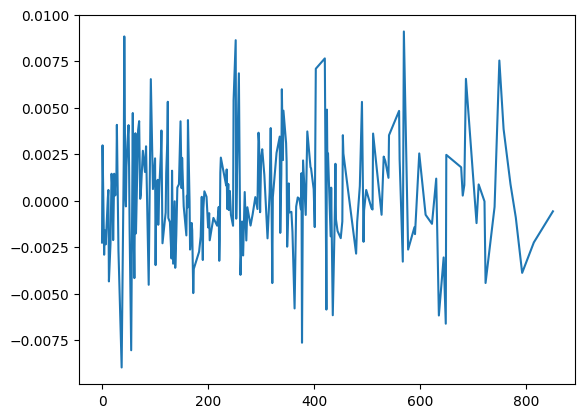

In [ ]:
df[df['Gene'].isin(c)]['Coefficient'].plot()

#Select KBest

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

In [20]:
sel = SelectKBest(f_classif, k=1000)
X_best = sel.fit(X, y)

In [21]:
mask = sel.get_support()
mask

array([False, False, False, ..., False, False, False])

In [22]:
X.columns[mask]

Index(['ENSG00000000938.13', 'ENSG00000003402.20', 'ENSG00000004799.8',
       'ENSG00000004939.15', 'ENSG00000006118.15', 'ENSG00000006625.18',
       'ENSG00000006704.11', 'ENSG00000006740.17', 'ENSG00000007402.12',
       'ENSG00000007968.7',
       ...
       'ENSG00000266524.3', 'ENSG00000267206.6', 'ENSG00000273540.4',
       'ENSG00000276043.5', 'ENSG00000276644.5', 'ENSG00000277494.2',
       'ENSG00000277758.5', 'ENSG00000278023.7', 'ENSG00000278889.4',
       'ENSG00000284753.2'],
      dtype='object', length=1000)

#Methods Intersection

In [10]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/selected_biomarker_genes_lasso.csv'

# Read the CSV file into a DataFrame
lasso_features = pd.read_csv(csv_filename)

# Display the DataFrame
print(lasso_features)

                    Gene  Coefficient
0     ENSG00000147381.11    -0.002255
1      ENSG00000221867.9     0.002973
2     ENSG00000067048.17     0.004885
3     ENSG00000168484.12     0.002709
4      ENSG00000244094.2    -0.002909
...                  ...          ...
1621   ENSG00000256646.8    -0.003978
1622   ENSG00000186795.1     0.001397
1623  ENSG00000166803.14     0.002292
1624  ENSG00000144671.10     0.004272
1625   ENSG00000197272.2    -0.000798

[1626 rows x 2 columns]


In [14]:
import pickle
with open('/content/drive/MyDrive/BioInfo/svmrfe_genes_1000.pkl', 'rb') as file:
    svm_features = list(pickle.load(file))

In [41]:
with open('/content/drive/MyDrive/BioInfo/upregulated_5000.pkl', 'rb') as file:
    louvain_features = pickle.load(file)
len(louvain_features)

4503

In [79]:
a = set(svm_features).intersection(set(lasso_features['Gene'].values))
len(a)

529

In [80]:
b = a.intersection(set(louvain_features))
len(b)

474

In [81]:
c = b.intersection(set(X.columns[mask].values))
len(c)

40

In [83]:
c

{'ENSG00000004939.15',
 'ENSG00000064205.10',
 'ENSG00000080031.10',
 'ENSG00000085552.17',
 'ENSG00000087128.10',
 'ENSG00000099953.10',
 'ENSG00000106341.11',
 'ENSG00000111344.11',
 'ENSG00000115507.10',
 'ENSG00000118785.14',
 'ENSG00000134115.13',
 'ENSG00000135069.14',
 'ENSG00000136695.15',
 'ENSG00000137203.15',
 'ENSG00000137648.19',
 'ENSG00000137875.4',
 'ENSG00000143105.7',
 'ENSG00000143167.12',
 'ENSG00000143320.9',
 'ENSG00000143590.14',
 'ENSG00000147689.16',
 'ENSG00000159527.3',
 'ENSG00000162771.8',
 'ENSG00000168484.12',
 'ENSG00000170965.10',
 'ENSG00000171004.18',
 'ENSG00000176771.17',
 'ENSG00000180871.8',
 'ENSG00000182010.11',
 'ENSG00000188340.2',
 'ENSG00000196549.12',
 'ENSG00000197403.4',
 'ENSG00000197587.11',
 'ENSG00000203740.4',
 'ENSG00000203757.2',
 'ENSG00000204866.8',
 'ENSG00000205667.3',
 'ENSG00000249662.6',
 'ENSG00000254726.3',
 'ENSG00000278889.4'}

In [82]:
d = c.intersection(set(top_genes_data.columns.values))
len(d)

0

#Louvain intersection

In [ ]:
import pickle

with open('/content/drive/MyDrive/BioInfo/Louvain_combined/cols_change_louvain_test2.pkl', 'rb') as file:
    louvain_meth = list(pickle.load(file))

In [ ]:
len(louvain_meth)

3873

In [ ]:
with open('/content/drive/MyDrive/BioInfo/ct_corr_5000.pkl', 'rb') as file:
    communities_tumor = pickle.load(file)
with open('/content/drive/MyDrive/BioInfo/cn_corr_5000.pkl', 'rb') as file:
    communities_normal = pickle.load(file)

In [ ]:
comm_n = dict()

for i, c in enumerate(communities_normal):
  comm_n[i] = set(c)
  print(i, len(comm_n[i]))

0 1773
1 1612
2 962
3 430
4 2


In [ ]:
comm_t = dict()

for i, c in enumerate(communities_tumor):
  comm_t[i] = set(c)
  print(i, len(comm_t[i]))

0 1823
1 1763
2 1127
3 60
4 3
5 3


In [ ]:
changes = []
for i in range(0, 5):
  changes.extend(list(comm_n[i].difference(comm_t[i])))
  changes.extend(list(comm_t[i].difference(comm_n[i])))
for i in range(5, 6):
  changes.extend(list(comm_t[i]))

changes = list(set(changes))
len(changes)

4503

In [ ]:
cols = set(df_normal.iloc[:, changes].columns.values)
len(set(louvain_meth).intersection(cols))

569

#LASSO METH

In [ ]:
df_tum = pd.read_csv('/content/drive/MyDrive/BioInfo/Louvain_combined/df_tumor.csv')
df_norm = pd.read_csv('/content/drive/MyDrive/BioInfo/Louvain_combined/df_normal.csv')

In [ ]:
df_tum

,ENSG00000274618.2,ENSG00000169474.4,ENSG00000169469.9,ENSG00000241794.2,ENSG00000275126.2,ENSG00000163209.15,ENSG00000203785.9,ENSG00000278705.1,ENSG00000278637.2,ENSG00000129824.16,...,ENSG00000130487.9,ENSG00000166803.14,ENSG00000205858.10,ENSG00000138075.14,ENSG00000130988.13,ENSG00000144671.10,ENSG00000197272.2,ENSG00000162843.17,ENSG00000205517.13,ENSG00000184166.2
0,-3.248793,0.625525,-2.745294,-3.417348,5.637561,-0.553691,-2.804904,7.218576,6.021782,-9.965784,...,-8.670096,-0.047517,-9.965784,-3.536559,-6.096786,-2.919638,-11.512387,-5.493297,1.280538,-9.965784
1,-3.248793,0.625987,-3.175861,-3.417348,5.637561,-0.547824,-2.804904,7.218576,6.021782,-9.965784,...,-7.664522,-0.047517,-9.965784,-3.538659,-5.649607,-2.972054,-11.334884,-5.493297,1.224447,-9.965784
2,5.499371,-3.809256,-2.818981,-1.183769,6.023098,-3.664118,-0.762436,8.394415,6.556803,-6.210897,...,5.221082,-0.470129,-9.965784,-6.189000,0.286358,-5.675445,-1.175173,-1.339710,-0.760204,-7.265345
3,6.516404,0.626255,3.181293,-1.489646,5.975614,5.716009,-3.334971,7.460942,6.014485,6.797497,...,-0.957127,0.750349,-9.965784,-7.362116,-0.762370,-3.530667,-2.554954,-5.304719,1.393229,-5.983932
4,4.075302,5.769105,5.378706,1.579084,3.114267,3.271893,1.331304,8.322488,6.815063,3.990574,...,-2.786929,-0.144170,-9.965784,-3.892609,-1.264745,-3.970790,-3.899115,-5.049308,-1.367895,-5.740818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,4.422912,-17.126873,0.893642,-9.965784,5.644067,-5.084547,-9.965784,7.026745,5.858700,-5.956796,...,-1.411830,-0.511691,-9.965784,-7.083893,0.834073,-6.727094,-4.502274,-2.711228,3.564077,-5.173970
1385,6.794864,-1.419982,2.583764,-3.237864,3.981688,1.373591,-9.965784,7.255306,6.153933,5.428186,...,-2.121895,-0.008682,-5.844769,-4.111436,-1.558530,-2.022651,-3.472181,-1.840113,3.765722,-9.965784
1386,3.893906,-13.843102,0.586339,-0.359749,3.456596,-12.180273,-9.965784,7.153865,5.550273,7.076910,...,-2.284090,-1.588140,-9.965784,-4.565490,-0.393516,-4.395905,-4.329747,-2.969170,0.838955,-5.559792
1387,5.834200,3.905243,5.347928,4.231586,4.989875,1.027610,2.984316,6.785327,4.664574,6.196674,...,-1.915524,-2.383078,-9.965784,-4.181057,1.604668,-4.061736,-3.084928,-2.431287,2.992086,-9.965784


In [ ]:
df_tum['tumor'] = 1

In [ ]:
df_norm

,ENSG00000274618.2,ENSG00000169474.4,ENSG00000169469.9,ENSG00000241794.2,ENSG00000275126.2,ENSG00000163209.15,ENSG00000203785.9,ENSG00000278705.1,ENSG00000278637.2,ENSG00000129824.16,...,ENSG00000130487.9,ENSG00000166803.14,ENSG00000205858.10,ENSG00000138075.14,ENSG00000130988.13,ENSG00000144671.10,ENSG00000197272.2,ENSG00000162843.17,ENSG00000205517.13,ENSG00000184166.2
0,4.756201,-14.317925,-12.836059,-9.965784,2.514880,-12.603083,-9.965784,5.463292,3.432599,6.362249,...,-8.006034,-2.652901,-9.965784,-4.123151,3.322582,-4.935460,-2.497694,-5.107803,4.831399,-6.345198
1,4.439038,-11.402290,-11.365301,-2.291239,1.968201,-12.014356,-9.965784,5.560562,3.506767,6.188071,...,-3.217530,-4.037414,-9.965784,-3.202176,2.713001,-4.576301,-1.107490,-5.112787,3.298030,-9.965784
2,4.544275,0.255390,0.265626,1.387087,3.473618,2.302081,-2.269512,5.910663,4.208985,5.693345,...,-0.920131,-2.924673,-9.965784,-3.317120,2.739693,-3.259994,0.538931,-4.764150,4.519979,-9.965784
3,4.634942,-14.733596,-13.118243,-9.965784,2.223052,-12.558703,-9.965784,6.057777,3.507325,6.093423,...,-5.047097,-2.667493,-5.643856,-4.362034,3.247523,-4.485465,-2.749061,-4.148161,3.705453,-9.965784
4,4.507623,-15.419905,-2.866186,-4.477141,1.545178,-12.909846,-9.965784,5.708753,3.527408,6.083294,...,-1.472035,-4.594225,-9.965784,-2.240709,3.421539,-3.828553,-1.404683,-4.181804,4.672007,-4.993092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,4.449086,-14.411152,-13.176845,-9.965784,3.313812,-12.376571,-9.965784,5.155575,4.345531,5.854622,...,-1.851335,-1.473931,-9.965784,-3.474255,2.783294,-3.729396,-1.899551,-4.457990,3.724141,-6.878321
319,5.161235,-14.459132,-13.248987,-2.136696,1.897085,-12.303775,-9.965784,5.901618,3.467279,-9.965784,...,-5.109343,-2.894322,-5.486812,-3.046209,3.616124,-6.613098,-3.908952,-5.276485,4.898888,-9.965784
320,4.407169,-15.273579,-4.650054,-9.965784,1.988848,-12.980991,-9.965784,5.394881,3.031413,-3.532825,...,-4.032855,-4.070967,-9.965784,-4.685557,3.938413,-4.404929,-3.357386,-3.725470,4.572546,-9.965784
321,4.013802,-15.036571,-13.947628,-9.965784,2.507236,-13.000575,-9.965784,5.888673,3.580001,-9.965784,...,-3.945349,-3.478748,-9.965784,-3.063845,4.718950,-5.090662,-2.734399,-4.566613,3.230976,-9.965784


In [ ]:
df_norm['tumor'] = 0

In [ ]:
df = pd.concat([df_norm, df_tum], axis=0, ignore_index=True)
df

,ENSG00000274618.2,ENSG00000169474.4,ENSG00000169469.9,ENSG00000241794.2,ENSG00000275126.2,ENSG00000163209.15,ENSG00000203785.9,ENSG00000278705.1,ENSG00000278637.2,ENSG00000129824.16,...,ENSG00000166803.14,ENSG00000205858.10,ENSG00000138075.14,ENSG00000130988.13,ENSG00000144671.10,ENSG00000197272.2,ENSG00000162843.17,ENSG00000205517.13,ENSG00000184166.2,tumor
0,4.756201,-14.317925,-12.836059,-9.965784,2.514880,-12.603083,-9.965784,5.463292,3.432599,6.362249,...,-2.652901,-9.965784,-4.123151,3.322582,-4.935460,-2.497694,-5.107803,4.831399,-6.345198,0
1,4.439038,-11.402290,-11.365301,-2.291239,1.968201,-12.014356,-9.965784,5.560562,3.506767,6.188071,...,-4.037414,-9.965784,-3.202176,2.713001,-4.576301,-1.107490,-5.112787,3.298030,-9.965784,0
2,4.544275,0.255390,0.265626,1.387087,3.473618,2.302081,-2.269512,5.910663,4.208985,5.693345,...,-2.924673,-9.965784,-3.317120,2.739693,-3.259994,0.538931,-4.764150,4.519979,-9.965784,0
3,4.634942,-14.733596,-13.118243,-9.965784,2.223052,-12.558703,-9.965784,6.057777,3.507325,6.093423,...,-2.667493,-5.643856,-4.362034,3.247523,-4.485465,-2.749061,-4.148161,3.705453,-9.965784,0
4,4.507623,-15.419905,-2.866186,-4.477141,1.545178,-12.909846,-9.965784,5.708753,3.527408,6.083294,...,-4.594225,-9.965784,-2.240709,3.421539,-3.828553,-1.404683,-4.181804,4.672007,-4.993092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,4.422912,-17.126873,0.893642,-9.965784,5.644067,-5.084547,-9.965784,7.026745,5.858700,-5.956796,...,-0.511691,-9.965784,-7.083893,0.834073,-6.727094,-4.502274,-2.711228,3.564077,-5.173970,1
1708,6.794864,-1.419982,2.583764,-3.237864,3.981688,1.373591,-9.965784,7.255306,6.153933,5.428186,...,-0.008682,-5.844769,-4.111436,-1.558530,-2.022651,-3.472181,-1.840113,3.765722,-9.965784,1
1709,3.893906,-13.843102,0.586339,-0.359749,3.456596,-12.180273,-9.965784,7.153865,5.550273,7.076910,...,-1.588140,-9.965784,-4.565490,-0.393516,-4.395905,-4.329747,-2.969170,0.838955,-5.559792,1
1710,5.834200,3.905243,5.347928,4.231586,4.989875,1.027610,2.984316,6.785327,4.664574,6.196674,...,-2.383078,-9.965784,-4.181057,1.604668,-4.061736,-3.084928,-2.431287,2.992086,-9.965784,1


In [ ]:
y = df['tumor']
X = df.drop('tumor', axis=1)

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 1.22295829, -1.08753908, -1.22078357, ..., -0.1089497 ,
         0.6576411 ,  1.38316795],
       [ 1.17672434, -0.81226034, -1.07285064, ..., -0.11142875,
         0.23546659, -0.61796314],
       [ 1.19206511,  0.2883955 ,  0.09702073, ...,  0.06200404,
         0.57189931, -0.61796314],
       ...,
       [ 1.09725862, -1.04270884,  0.12927893, ...,  0.95493621,
        -0.44157763,  1.81726898],
       [ 1.38010177,  0.63299518,  0.60821294, ...,  1.22251164,
         0.15123271, -0.61796314],
       [ 1.7680748 , -0.12494297, -0.33430257, ...,  0.21745469,
         0.59084278, -0.61796314]])

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1707    1
1708    1
1709    1
1710    1
1711    1
Name: tumor, Length: 1712, dtype: int64

In [ ]:
lasso_cv = LassoCV(cv=5, max_iter=2000)
lasso_cv.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.826e-02, tolerance: 2.621e-02
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=5, max_iter=2000)

In [ ]:
selected_indices = lasso_cv.coef_ != 0
selected_indices

array([False, False, False, ..., False, False,  True])

In [ ]:
selected_genes = X.loc[:, selected_indices]
selected_genes

,ENSG00000186832.9,ENSG00000198074.10,ENSG00000160181.9,ENSG00000123364.5,ENSG00000188293.6,ENSG00000131668.14,ENSG00000173237.4,ENSG00000136695.15,ENSG00000239839.7,ENSG00000196800.6,...,ENSG00000064205.10,ENSG00000121634.6,ENSG00000186047.10,ENSG00000178645.13,ENSG00000281406.2,ENSG00000175879.9,ENSG00000151136.15,ENSG00000182450.13,ENSG00000197272.2,ENSG00000184166.2
0,-7.640258,-3.183114,-12.775324,-18.413500,-9.965784,-9.965784,-9.965784,-5.779918,-9.965784,-0.408895,...,3.154292,-9.965784,-1.162622,-7.429731,-1.309359,-3.163116,-4.711425,-13.953101,-2.497694,-6.345198
1,-5.335661,-3.986216,-11.179304,-13.072254,-4.783887,-9.965784,-9.965784,-9.965784,1.535207,-2.409661,...,2.988448,-9.965784,-1.728813,-5.339345,-1.202572,-0.960160,-1.548776,-11.473054,-1.107490,-9.965784
2,-1.167595,-5.083141,-12.782474,-17.964578,-9.965784,-9.965784,-9.965784,-9.965784,-3.273692,-9.965784,...,4.125081,-9.965784,-2.119667,-6.148161,0.109962,-2.528733,-2.030781,-6.358762,0.538931,-9.965784
3,-5.427919,-2.203568,-6.134930,-11.838636,-4.791857,-9.965784,-9.965784,-9.965784,-1.170719,-0.615508,...,3.222959,-9.965784,-2.005782,-4.117787,-2.610874,-2.296206,-2.828518,-13.971913,-2.749061,-9.965784
4,-5.708937,-2.306859,-13.019184,-17.548077,-9.965784,-4.270904,-9.965784,-9.965784,-1.052296,-3.291945,...,3.990719,-9.965784,-2.481163,-6.480357,-1.360675,-3.367002,-1.304898,-13.758350,-1.404683,-4.993092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,4.217942,-9.965784,2.266053,-2.452971,-1.405834,3.922940,3.060912,-2.366615,-9.965784,-0.849180,...,1.799377,-9.965784,2.119821,-9.965784,-0.538891,-1.635319,-4.082385,-14.676000,-4.502274,-5.173970
1708,0.766485,-1.577336,-5.129261,-8.393734,1.006190,-6.107803,-2.468332,1.337083,-9.965784,-2.624154,...,-0.523670,-5.795859,1.489492,-9.965784,1.991136,-5.941883,-1.852258,-15.136939,-3.472181,-9.965784
1709,4.040073,2.429616,-13.810311,-2.419900,0.606821,-1.483985,-3.570036,-1.956796,-2.314733,-9.965784,...,0.667029,-5.339345,-1.657900,-9.965784,1.864374,-1.295048,1.627412,-13.964251,-4.329747,-5.559792
1710,5.418534,3.361221,-13.493025,-3.100874,0.811471,-1.472729,-9.965784,0.265317,-1.812486,-0.481969,...,2.712882,-9.965784,-1.231752,-9.965784,-0.253257,-0.413895,-0.089926,-7.070695,-3.084928,-9.965784


In [ ]:
selected_coefficients = lasso_cv.coef_[selected_indices]
selected_coefficients

array([ 2.94068008e-04,  5.16255445e-04,  1.16092546e-04,  8.63443153e-03,
        5.29277404e-03,  1.39471567e-03,  2.32687628e-03,  5.83962518e-03,
       -4.15002276e-03,  1.68276791e-03,  1.09847679e-03,  1.66547231e-03,
        8.27706064e-03,  1.47534045e-03,  2.23611230e-03, -3.74942496e-03,
        9.40059568e-04,  1.89075685e-03, -4.96874633e-04,  2.22292789e-03,
        1.34761504e-03,  1.09066596e-03,  8.30229074e-04,  1.05023407e-04,
        5.71083441e-03,  2.29583914e-04, -2.24926445e-03,  2.95368220e-03,
        1.86595138e-03,  5.67727521e-04,  1.76304789e-03, -2.20771102e-03,
       -1.25532339e-03,  2.25127873e-03,  1.70885596e-03,  3.32310570e-03,
        1.87904745e-03, -8.21074617e-04, -2.55134968e-04, -2.51326377e-03,
        5.00601899e-03, -6.35572334e-03, -3.09307350e-03,  3.93203493e-03,
       -2.46919518e-03,  2.03674989e-03, -3.53249651e-04, -1.64673431e-03,
        1.52322311e-03,  3.70058873e-03, -2.76672854e-03, -1.27080551e-03,
        1.40371350e-03, -

In [ ]:
print("Selected Biomarker Genes:")
for gene, coef in zip(selected_genes, selected_coefficients):
    print(f"{gene}: {coef}")

Selected Biomarker Genes:
ENSG00000186832.9: 0.0002940680084251768
ENSG00000198074.10: 0.0005162554453003379
ENSG00000160181.9: 0.00011609254573160906
ENSG00000123364.5: 0.00863443152646074
ENSG00000188293.6: 0.0052927740366275206
ENSG00000131668.14: 0.0013947156679960369
ENSG00000173237.4: 0.002326876284796373
ENSG00000136695.15: 0.005839625183015182
ENSG00000239839.7: -0.004150022763518799
ENSG00000196800.6: 0.0016827679125416895
ENSG00000136688.11: 0.0010984767886835192
ENSG00000214336.5: 0.0016654723110234098
ENSG00000164093.17: 0.008277060642293518
ENSG00000142484.7: 0.0014753404530502504
ENSG00000100665.12: 0.002236112301829501
ENSG00000186474.15: -0.003749424958454719
ENSG00000255501.3: 0.0009400595678579937
ENSG00000072080.11: 0.0018907568532683314
ENSG00000155897.10: -0.0004968746325891312
ENSG00000146047.7: 0.0022229278863180302
ENSG00000284638.1: 0.0013476150381053413
ENSG00000205116.3: 0.0010906659590868375
ENSG00000164266.11: 0.0008302290736230323
ENSG00000286015.1: 0.0001

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in selected_genes:
  if g in genes:
    print(g)

In [ ]:
import csv

# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_2.csv'

# Write the selected genes and their coefficients to the CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write header
    writer.writerow(['Gene', 'Coefficient'])

    # Write each selected gene and its coefficient
    for gene, coef in zip(selected_genes, selected_coefficients):
        writer.writerow([gene, coef])

In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_2.csv'

# Read the CSV file into a DataFrame
df_lasso_meth = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso_meth)

                   Gene  Coefficient
0     ENSG00000186832.9     0.000294
1    ENSG00000198074.10     0.000516
2     ENSG00000160181.9     0.000116
3     ENSG00000123364.5     0.008634
4     ENSG00000188293.6     0.005293
..                  ...          ...
396   ENSG00000175879.9    -0.001143
397  ENSG00000151136.15     0.002399
398  ENSG00000182450.13    -0.001957
399   ENSG00000197272.2    -0.000207
400   ENSG00000184166.2     0.003714

[401 rows x 2 columns]


In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/selected_biomarker_genes_lasso.csv'

# Read the CSV file into a DataFrame
df_lasso = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso)

                    Gene  Coefficient
0     ENSG00000147381.11    -0.002255
1      ENSG00000221867.9     0.002973
2     ENSG00000067048.17     0.004885
3     ENSG00000168484.12     0.002709
4      ENSG00000244094.2    -0.002909
...                  ...          ...
1621   ENSG00000256646.8    -0.003978
1622   ENSG00000186795.1     0.001397
1623  ENSG00000166803.14     0.002292
1624  ENSG00000144671.10     0.004272
1625   ENSG00000197272.2    -0.000798

[1626 rows x 2 columns]


In [ ]:
len(df_lasso['Gene'].values)

1626

In [ ]:
a = set(df_lasso_meth['Gene'].values)
b = set(df_lasso['Gene'].values)
c = a.intersection(b)
c

{'ENSG00000002726.21',
 'ENSG00000006128.12',
 'ENSG00000036565.15',
 'ENSG00000036828.17',
 'ENSG00000042813.8',
 'ENSG00000043039.7',
 'ENSG00000055813.6',
 'ENSG00000060718.22',
 'ENSG00000064205.10',
 'ENSG00000070729.14',
 'ENSG00000072080.11',
 'ENSG00000074771.4',
 'ENSG00000075043.19',
 'ENSG00000075429.9',
 'ENSG00000075461.6',
 'ENSG00000080224.17',
 'ENSG00000085552.17',
 'ENSG00000088386.17',
 'ENSG00000100033.16',
 'ENSG00000100078.4',
 'ENSG00000100170.10',
 'ENSG00000100665.12',
 'ENSG00000101204.18',
 'ENSG00000102021.11',
 'ENSG00000102794.10',
 'ENSG00000103355.13',
 'ENSG00000103449.12',
 'ENSG00000103546.18',
 'ENSG00000103723.16',
 'ENSG00000104055.16',
 'ENSG00000105370.8',
 'ENSG00000106341.11',
 'ENSG00000108018.15',
 'ENSG00000109208.5',
 'ENSG00000111046.4',
 'ENSG00000111344.11',
 'ENSG00000112499.13',
 'ENSG00000115507.10',
 'ENSG00000115616.3',
 'ENSG00000117971.12',
 'ENSG00000118322.14',
 'ENSG00000118733.17',
 'ENSG00000118785.14',
 'ENSG00000118972.3',


In [ ]:
len(c)

279

#SVM RFE METH

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
svc = SVC(kernel="linear")

In [ ]:
rfe = RFE(estimator=svc, step=1, n_features_to_select=1000)
rfe.fit(X, y)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=1000)

In [ ]:
rfe.n_features_

1000

In [ ]:
mask_svm = rfe.support_
mask_svm

array([ True, False,  True, ..., False,  True, False])

In [ ]:
X.columns[mask_svm].values

array(['ENSG00000274618.2', 'ENSG00000169469.9', 'ENSG00000143556.9',
       'ENSG00000147381.11', 'ENSG00000184270.6', 'ENSG00000186832.9',
       'ENSG00000168484.12', 'ENSG00000168530.16', 'ENSG00000198074.10',
       'ENSG00000160182.3', 'ENSG00000167656.5', 'ENSG00000178363.5',
       'ENSG00000170373.8', 'ENSG00000171564.12', 'ENSG00000185686.18',
       'ENSG00000169297.8', 'ENSG00000160181.9', 'ENSG00000205076.4',
       'ENSG00000133636.11', 'ENSG00000123364.5', 'ENSG00000180818.5',
       'ENSG00000169509.6', 'ENSG00000159527.3', 'ENSG00000188293.6',
       'ENSG00000131668.14', 'ENSG00000198443.6', 'ENSG00000182334.3',
       'ENSG00000178934.5', 'ENSG00000170454.6', 'ENSG00000123388.4',
       'ENSG00000121742.19', 'ENSG00000125788.6', 'ENSG00000203737.5',
       'ENSG00000234068.7', 'ENSG00000122133.17', 'ENSG00000124237.6',
       'ENSG00000173237.4', 'ENSG00000127928.13', 'ENSG00000011677.13',
       'ENSG00000129455.15', 'ENSG00000006377.11', 'ENSG00000170689.10',
     

In [ ]:
import pickle

#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/svmrfe_genes_meth_1000_2.pkl', 'wb') as file:
    #pickle.dump(X.columns[mask_svm].values, file)

In [ ]:
import pickle

with open('/content/drive/MyDrive/BioInfo/Louvain_combined/svmrfe_genes_meth_1000_2.pkl', 'rb') as file:
    svm_rfe_meth = list(pickle.load(file))

In [ ]:
with open('/content/drive/MyDrive/BioInfo/svmrfe_genes_1000.pkl', 'rb') as file:
  svm_rfe = list(pickle.load(file))

In [ ]:
len(svm_rfe)

1000

In [ ]:
e = set(svm_rfe_meth).intersection(set(svm_rfe))
len(e)

526

#PCA METH

In [ ]:
from sklearn.decomposition import PCA

# Step 2: Perform PCA
pca = PCA()
pca.fit(X)

# Step 3: Extract Components
components = pca.components_

# Step 4: Select Top Components
# Since the number of components equals the number of genes,
# you'll need to determine the number of components to select
# based on the explained variance or a threshold.
# For example, if you want to select components explaining 90% of the variance:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])

# Step 5: Identify Important Genes
# Get the absolute loadings of genes on the selected components
important_genes = pd.DataFrame(abs(components[:n_components]), columns=X.columns)

# Step 6: Rank Genes
# You can sum the absolute loadings across components to rank genes
gene_ranks = important_genes.sum(axis=0)

# Step 7: Select Top Genes
top_genes = gene_ranks.nlargest(500).index

# Optional: Get the data for the top genes
top_genes_data = X[top_genes]

In [ ]:
top_genes_data

,ENSG00000180305.5,ENSG00000179673.5,ENSG00000113196.3,ENSG00000169900.8,ENSG00000167414.4,ENSG00000120937.9,ENSG00000140465.14,ENSG00000240972.2,ENSG00000122585.8,ENSG00000124935.4,...,ENSG00000000005.6,ENSG00000196071.5,ENSG00000188778.6,ENSG00000174469.23,ENSG00000162188.6,ENSG00000065609.14,ENSG00000165794.10,ENSG00000185247.15,ENSG00000197273.4,ENSG00000196431.4
0,-18.974287,-7.194101,-2.148898,-8.211299,-2.522991,-17.025726,-1.058335,-19.421629,-18.654807,-13.861406,...,-3.455603,-8.993520,-6.599229,-9.368335,-2.278426,-9.685818,-6.873114,-9.965784,1.264085,-4.828281
1,-6.300792,-3.714065,-3.609993,-13.065560,-1.966348,-5.719454,-5.462664,-4.691523,-9.965784,-4.605270,...,-1.739854,-11.540448,-7.987684,-4.654717,-4.599875,-5.993299,-11.745841,-9.965784,-1.484260,-2.866700
2,-7.908959,-10.398209,-18.495480,-6.650664,-2.019591,-4.790366,-1.129173,-19.470024,-18.139223,-14.175372,...,-2.527328,-14.575164,-7.560608,-8.222048,-2.977927,-9.785306,-6.794800,-6.002310,-3.957646,-3.977100
3,-7.733067,-7.139399,-18.772099,-8.226740,-0.719456,-16.908609,-3.408284,-7.227433,-9.276659,-13.708387,...,-1.509109,-9.032171,-8.924476,-7.757145,-3.905454,-8.394609,-6.674329,-9.965784,-0.688818,-3.863546
4,-7.451800,-6.948267,-10.834104,-7.898828,-18.207102,-2.173948,-9.285795,-5.833995,-7.133594,-14.797621,...,-3.540848,-14.771742,-9.826786,-7.645909,-2.518300,-8.081807,-3.392153,-9.965784,-1.936798,-4.729292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,-7.321926,-3.951437,-18.789985,-17.966637,-4.834871,-16.345505,-12.633302,-18.879517,-15.882210,-16.616552,...,-3.590373,-9.444627,-7.667135,-7.058946,-1.622785,-13.868446,-14.689236,-9.965784,0.295767,-9.965784
1708,-18.654528,-10.325543,-16.068726,-8.577820,-5.868412,-8.348707,-19.036139,-19.387437,-8.679693,-16.893249,...,-1.838278,-15.871351,-9.375180,2.945598,-2.331098,-13.334062,-5.504330,-3.714065,-3.864317,-9.965784
1709,-18.458729,-9.765263,-17.785289,-18.165882,-2.140508,-17.543214,-8.338542,-5.612508,-15.919063,-5.778213,...,-3.397453,-4.990729,-6.315737,-0.575299,-1.785573,-6.426642,-0.525818,-9.965784,-5.197695,-9.965784
1710,-6.847890,-7.409948,-18.087138,-4.626193,-1.881963,-7.230878,-4.663665,-19.252433,-8.059151,-15.505324,...,-3.823895,-8.704713,-7.877739,-2.621109,-3.995859,-5.901639,-3.897367,-9.965784,-11.802702,-2.521183


In [ ]:
with open('/content/drive/MyDrive/BioInfo/Louvain_combined/cols_change_louvain_test2.pkl', 'rb') as file:
    louvain_meth = list(pickle.load(file))

In [ ]:
louvain_meth

['ENSG00000274618.2',
 'ENSG00000169474.4',
 'ENSG00000169469.9',
 'ENSG00000241794.2',
 'ENSG00000275126.2',
 'ENSG00000163209.15',
 'ENSG00000203785.9',
 'ENSG00000278705.1',
 'ENSG00000278637.2',
 'ENSG00000205420.11',
 'ENSG00000143556.9',
 'ENSG00000275379.2',
 'ENSG00000147381.11',
 'ENSG00000278588.2',
 'ENSG00000221867.9',
 'ENSG00000276410.4',
 'ENSG00000185479.6',
 'ENSG00000197172.10',
 'ENSG00000134757.5',
 'ENSG00000186847.6',
 'ENSG00000277775.2',
 'ENSG00000184270.6',
 'ENSG00000188373.5',
 'ENSG00000134184.13',
 'ENSG00000197061.5',
 'ENSG00000170465.10',
 'ENSG00000163216.7',
 'ENSG00000274997.2',
 'ENSG00000283644.1',
 'ENSG00000147896.3',
 'ENSG00000286522.2',
 'ENSG00000186832.9',
 'ENSG00000273703.2',
 'ENSG00000197641.12',
 'ENSG00000168484.12',
 'ENSG00000204019.5',
 'ENSG00000278463.2',
 'ENSG00000124610.5',
 'ENSG00000184357.5',
 'ENSG00000287080.2',
 'ENSG00000186081.12',
 'ENSG00000198681.7',
 'ENSG00000168530.16',
 'ENSG00000276368.2',
 'ENSG00000149651.4',


In [ ]:
a = set(top_genes_data.columns.values)
c = set(louvain_meth).intersection(a)

c

{'ENSG00000006128.12',
 'ENSG00000007038.11',
 'ENSG00000011677.13',
 'ENSG00000016490.16',
 'ENSG00000019186.10',
 'ENSG00000044012.4',
 'ENSG00000046774.10',
 'ENSG00000056291.17',
 'ENSG00000060566.14',
 'ENSG00000065609.14',
 'ENSG00000066032.18',
 'ENSG00000069482.7',
 'ENSG00000070748.19',
 'ENSG00000070886.12',
 'ENSG00000071677.1',
 'ENSG00000072041.17',
 'ENSG00000073598.6',
 'ENSG00000074317.11',
 'ENSG00000075043.19',
 'ENSG00000077080.10',
 'ENSG00000077274.9',
 'ENSG00000078579.9',
 'ENSG00000079689.14',
 'ENSG00000086506.3',
 'ENSG00000087250.9',
 'ENSG00000089199.10',
 'ENSG00000091482.8',
 'ENSG00000095596.12',
 'ENSG00000095777.17',
 'ENSG00000096264.14',
 'ENSG00000096395.11',
 'ENSG00000099399.6',
 'ENSG00000100341.12',
 'ENSG00000100373.10',
 'ENSG00000100665.12',
 'ENSG00000101074.5',
 'ENSG00000101180.16',
 'ENSG00000101405.3',
 'ENSG00000101438.4',
 'ENSG00000101746.15',
 'ENSG00000102539.5',
 'ENSG00000103546.18',
 'ENSG00000104371.5',
 'ENSG00000105141.6',
 'EN

intersezione PCA e Louvain

In [ ]:
len(c)

350

#SELECTKBEST METH

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
sel = SelectKBest(f_classif, k=1000)
X_best = sel.fit(X, y)

In [ ]:
mask = sel.get_support()
mask

array([ True, False, False, ..., False, False, False])

In [ ]:
X.columns[mask]

Index(['ENSG00000274618.2', 'ENSG00000147896.3', 'ENSG00000186832.9',
       'ENSG00000168484.12', 'ENSG00000168530.16', 'ENSG00000198074.10',
       'ENSG00000167656.5', 'ENSG00000189099.11', 'ENSG00000170373.8',
       'ENSG00000125363.14',
       ...
       'ENSG00000066813.14', 'ENSG00000133392.18', 'ENSG00000177679.16',
       'ENSG00000140090.18', 'ENSG00000186891.14', 'ENSG00000075218.19',
       'ENSG00000112742.10', 'ENSG00000130487.9', 'ENSG00000166803.14',
       'ENSG00000130988.13'],
      dtype='object', length=1000)

intersezione PCA, KBEST e Louvain

In [ ]:
d = c.intersection(set(X.columns[mask].values))
print(d)
len(d)

{'ENSG00000171450.6', 'ENSG00000019186.10', 'ENSG00000197273.4', 'ENSG00000164129.12', 'ENSG00000116014.10', 'ENSG00000179914.5', 'ENSG00000121742.19', 'ENSG00000146469.13', 'ENSG00000109255.11', 'ENSG00000155897.10', 'ENSG00000148798.11', 'ENSG00000069482.7', 'ENSG00000185686.18', 'ENSG00000179399.15', 'ENSG00000132872.12', 'ENSG00000149516.14', 'ENSG00000167656.5', 'ENSG00000164821.5', 'ENSG00000124205.18'}


19

In [ ]:
with open('/content/drive/MyDrive/BioInfo/Louvain_combined/candidate_biomarker_19.pkl', 'wb') as file:
    pickle.dump(c, file)

HOXB9 biomarker lung tumor

LY6D potential marker lung tumor

In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_2.csv'

# Read the CSV file into a DataFrame
df_lasso_meth = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso_meth)

                   Gene  Coefficient
0     ENSG00000186832.9     0.000294
1    ENSG00000198074.10     0.000516
2     ENSG00000160181.9     0.000116
3     ENSG00000123364.5     0.008634
4     ENSG00000188293.6     0.005293
..                  ...          ...
396   ENSG00000175879.9    -0.001143
397  ENSG00000151136.15     0.002399
398  ENSG00000182450.13    -0.001957
399   ENSG00000197272.2    -0.000207
400   ENSG00000184166.2     0.003714

[401 rows x 2 columns]


intersezione PCA, KBEST, LASSO e Louvain

In [ ]:
res = d.intersection(set(df_lasso_meth['Gene'].values))

In [ ]:
res

{'ENSG00000109255.11', 'ENSG00000155897.10'}

In [ ]:
a = set(louvain_meth).intersection(set(df_lasso_meth['Gene'].values))
b = a.intersection(set(svm_rfe_meth))
len(b)

150

In [ ]:
genes_detected = ['ENSG00000109255.11', 'ENSG00000155897.10']
protein_related = ['NMU', 'ADCY8']

intersezione LASSO e Louvain

In [ ]:
biomarker = ['PITX2', 'CST1', 'HOXB9', 'LY6D']

In [ ]:
out = set(louvain_meth).intersection(set(df_lasso_meth['Gene'].values))
len(out)

302

In [ ]:
svm_rfe_meth

['ENSG00000274618.2',
 'ENSG00000169469.9',
 'ENSG00000143556.9',
 'ENSG00000147381.11',
 'ENSG00000184270.6',
 'ENSG00000186832.9',
 'ENSG00000168484.12',
 'ENSG00000168530.16',
 'ENSG00000198074.10',
 'ENSG00000160182.3',
 'ENSG00000167656.5',
 'ENSG00000178363.5',
 'ENSG00000170373.8',
 'ENSG00000171564.12',
 'ENSG00000185686.18',
 'ENSG00000169297.8',
 'ENSG00000160181.9',
 'ENSG00000205076.4',
 'ENSG00000133636.11',
 'ENSG00000123364.5',
 'ENSG00000180818.5',
 'ENSG00000169509.6',
 'ENSG00000159527.3',
 'ENSG00000188293.6',
 'ENSG00000131668.14',
 'ENSG00000198443.6',
 'ENSG00000182334.3',
 'ENSG00000178934.5',
 'ENSG00000170454.6',
 'ENSG00000123388.4',
 'ENSG00000121742.19',
 'ENSG00000125788.6',
 'ENSG00000203737.5',
 'ENSG00000234068.7',
 'ENSG00000122133.17',
 'ENSG00000124237.6',
 'ENSG00000173237.4',
 'ENSG00000127928.13',
 'ENSG00000011677.13',
 'ENSG00000129455.15',
 'ENSG00000006377.11',
 'ENSG00000170689.10',
 'ENSG00000214511.3',
 'ENSG00000181617.6',
 'ENSG00000136695

intersezione LASSO, SVM e Louvain

In [ ]:
res_tot = set(svm_rfe_meth).intersection(out)
len(res_tot)

150

In [ ]:
r = res_tot.intersection(set(X.columns[mask].values))
r

{'ENSG00000085552.17',
 'ENSG00000105370.8',
 'ENSG00000113722.17',
 'ENSG00000117971.12',
 'ENSG00000118785.14',
 'ENSG00000128165.9',
 'ENSG00000136695.15',
 'ENSG00000137875.4',
 'ENSG00000147689.16',
 'ENSG00000147873.5',
 'ENSG00000149452.16',
 'ENSG00000155897.10',
 'ENSG00000156234.7',
 'ENSG00000158055.16',
 'ENSG00000163710.9',
 'ENSG00000164485.15',
 'ENSG00000170965.10',
 'ENSG00000174697.5',
 'ENSG00000176771.17',
 'ENSG00000177324.14',
 'ENSG00000180433.5',
 'ENSG00000181009.5',
 'ENSG00000183733.6',
 'ENSG00000185519.9',
 'ENSG00000186832.9',
 'ENSG00000188340.2',
 'ENSG00000197403.4',
 'ENSG00000197683.5',
 'ENSG00000198074.10',
 'ENSG00000204866.8',
 'ENSG00000214946.14',
 'ENSG00000217442.4',
 'ENSG00000234602.9',
 'ENSG00000239839.7',
 'ENSG00000241128.2',
 'ENSG00000249662.6'}

In [ ]:
len(r)

36

In [ ]:
links_meth = pd.read_csv('/content/drive/MyDrive/lung/methylation_gene_connections.csv')
links_meth

,gene_name,Name,gene_id
0,A1BG,cg22568540,ENSG00000121410.12
1,A2M,cg12058490,ENSG00000175899.15
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
4,A4GALT,cg07393322,ENSG00000128274.17
...,...,...,...
21429,ZYX,cg03100196,ENSG00000159840.16
21430,ZZEF1,cg05922057,ENSG00000074755.15
21431,ZZEF1,cg07607921,ENSG00000074755.15
21432,ZZZ3,cg04127303,ENSG00000036549.13


In [ ]:
candidate_biomarker = []
for gene in r:
  if gene in links_meth['gene_id'].values:
    candidate_biomarker.append(gene)
candidate_biomarker = set(candidate_biomarker)
print(candidate_biomarker)

{'ENSG00000239839.7', 'ENSG00000118785.14', 'ENSG00000156234.7', 'ENSG00000198074.10', 'ENSG00000105370.8', 'ENSG00000158055.16', 'ENSG00000085552.17', 'ENSG00000155897.10', 'ENSG00000147873.5', 'ENSG00000170965.10', 'ENSG00000149452.16', 'ENSG00000117971.12', 'ENSG00000197683.5', 'ENSG00000137875.4', 'ENSG00000147689.16', 'ENSG00000163710.9', 'ENSG00000113722.17', 'ENSG00000186832.9', 'ENSG00000174697.5', 'ENSG00000164485.15'}


In [ ]:
len(candidate_biomarker)

20

In [ ]:
a = {'ENSG00000239839.7', 'ENSG00000118785.14', 'ENSG00000156234.7', 'ENSG00000198074.10', 'ENSG00000105370.8', 'ENSG00000158055.16', 'ENSG00000085552.17', 'ENSG00000155897.10', 'ENSG00000147873.5', 'ENSG00000170965.10', 'ENSG00000149452.16', 'ENSG00000117971.12', 'ENSG00000197683.5', 'ENSG00000137875.4', 'ENSG00000147689.16', 'ENSG00000163710.9', 'ENSG00000113722.17', 'ENSG00000186832.9', 'ENSG00000174697.5', 'ENSG00000164485.15'}
b = a.intersection(set(top_genes_data.columns.values))
b

{'ENSG00000155897.10'}

In [ ]:
#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/candidate_biomarker_20.pkl', 'wb') as file:
    #pickle.dump(candidate_biomarker, file)

BARX2 biomarker

ETV4 biomarker

COL11A1 biomarker

CDX1 therapeutic target

FAM83A biomarker

XDH biomarker

TERT biomarker

TFAP2A biomarker

MMP11 top biomarker

praticamente tutti sono biomarker


DEFA3, SPP1, CXCL13, AKR1B10, LIM2, IGSF9, ADCY8, PLAC1, CHRNB4, FAM83A, KRT16, LEP,

In [ ]:
import pickle

with open('/content/drive/MyDrive/BioInfo/Louvain_combined/genes_network_abs.pkl', 'rb') as file:
    genes = list(pickle.load(file))

In [ ]:
genes[-20:]

['ENSG00000069206.15',
 'ENSG00000137975.8',
 'ENSG00000196748.10',
 'ENSG00000123496.8',
 'ENSG00000196734.9',
 'ENSG00000183840.7',
 'ENSG00000254726.3',
 'ENSG00000089101.19',
 'ENSG00000105877.18',
 'ENSG00000169252.6',
 'ENSG00000165238.16',
 'ENSG00000143340.6',
 'ENSG00000198692.10',
 'ENSG00000112761.21',
 'ENSG00000130540.14',
 'ENSG00000125207.7',
 'ENSG00000118972.3',
 'ENSG00000117399.14',
 'ENSG00000124657.1',
 'ENSG00000131771.14']

In [ ]:
candidate_biomarker = []
gene_names = []
for gene in genes[-20:]:
  if gene in links_meth['gene_id'].values:
    candidate_biomarker.append(gene)
    gene_names.append(links_meth[links_meth['gene_id'] == gene]['gene_name'].values)
candidate_biomarker = set(candidate_biomarker)
print(candidate_biomarker)

{'ENSG00000169252.6', 'ENSG00000069206.15', 'ENSG00000137975.8', 'ENSG00000165238.16', 'ENSG00000130540.14', 'ENSG00000131771.14', 'ENSG00000118972.3', 'ENSG00000124657.1', 'ENSG00000125207.7', 'ENSG00000123496.8', 'ENSG00000196734.9', 'ENSG00000117399.14', 'ENSG00000183840.7'}


In [ ]:
gene_names

[array(['ADAM7', 'ADAM7'], dtype=object),
 array(['CLCA2'], dtype=object),
 array(['IL13RA2'], dtype=object),
 array(['LCE1B', 'LCE1B'], dtype=object),
 array(['GPR39', 'GPR39'], dtype=object),
 array(['ADRB2', 'ADRB2'], dtype=object),
 array(['WNK2', 'WNK2'], dtype=object),
 array(['SULT4A1', 'SULT4A1'], dtype=object),
 array(['PIWIL1', 'PIWIL1'], dtype=object),
 array(['FGF23', 'FGF23'], dtype=object),
 array(['CDC20', 'CDC20'], dtype=object),
 array(['OR2B6'], dtype=object),
 array(['PPP1R1B', 'PPP1R1B'], dtype=object)]

In [ ]:
len(candidate_biomarker)

13

In [ ]:
with open('/content/drive/MyDrive/BioInfo/Louvain_combined/svmrfe_genes_meth_1000_2.pkl', 'rb') as file:
    svm_rfe_meth = list(pickle.load(file))

In [ ]:
res = set(genes).intersection(set(svm_rfe_meth))
res

{'ENSG00000065325.13',
 'ENSG00000088386.17',
 'ENSG00000118972.3',
 'ENSG00000124657.1',
 'ENSG00000127928.13',
 'ENSG00000128218.8',
 'ENSG00000128564.7',
 'ENSG00000129744.3',
 'ENSG00000130540.14',
 'ENSG00000132744.8',
 'ENSG00000136694.9',
 'ENSG00000137673.9',
 'ENSG00000138207.14',
 'ENSG00000143320.9',
 'ENSG00000143556.9',
 'ENSG00000152670.19',
 'ENSG00000164756.12',
 'ENSG00000166407.14',
 'ENSG00000166796.12',
 'ENSG00000167759.13',
 'ENSG00000169181.13',
 'ENSG00000169436.17',
 'ENSG00000170370.12',
 'ENSG00000170374.6',
 'ENSG00000175868.14',
 'ENSG00000179914.5',
 'ENSG00000183960.9',
 'ENSG00000254726.3'}

In [ ]:
len(res)

28

In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_2.csv'

# Read the CSV file into a DataFrame
df_lasso_meth = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso_meth)

                   Gene  Coefficient
0     ENSG00000186832.9     0.000294
1    ENSG00000198074.10     0.000516
2     ENSG00000160181.9     0.000116
3     ENSG00000123364.5     0.008634
4     ENSG00000188293.6     0.005293
..                  ...          ...
396   ENSG00000175879.9    -0.001143
397  ENSG00000151136.15     0.002399
398  ENSG00000182450.13    -0.001957
399   ENSG00000197272.2    -0.000207
400   ENSG00000184166.2     0.003714

[401 rows x 2 columns]


In [ ]:
r = res.intersection(set(df_lasso_meth['Gene'].values))
len(r)

7

In [ ]:
r

{'ENSG00000088386.17',
 'ENSG00000118972.3',
 'ENSG00000128218.8',
 'ENSG00000128564.7',
 'ENSG00000152670.19',
 'ENSG00000169181.13',
 'ENSG00000254726.3'}

In [ ]:
biomarker = ['SLC15A1', 'FGF23', 'VPREB3', 'VGF', 'DDX4', 'GSG1L', 'MEX3A']

#LASSO COMBINED NETWORK

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BioInfo/Louvain_combined/df_combined_network.csv')

In [ ]:
df

,ENSG00000000005.6,ENSG00000001626.16,ENSG00000002726.21,ENSG00000002745.13,ENSG00000003096.14,ENSG00000003989.18,ENSG00000004776.13,ENSG00000004799.8,ENSG00000004809.14,ENSG00000004838.14,...,ENSG00000288602.1,ENSG00000288607.1,ENSG00000288611.1,ENSG00000288616.1,ENSG00000288631.1,ENSG00000288637.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,tumor
0,2.067527,4.152984,0.768962,0.000000,1.913176,0.699724,0.000000,4.176226,0.469847,8.977078,...,7.503145,8.737814,9.767601,6.857710,9.864713,9.605410,5.596439,8.341529,2.985103,1.0
1,3.197340,7.338500,3.314785,1.468182,0.172326,0.000000,0.000000,2.433565,1.339823,5.099704,...,7.519281,7.618399,10.100203,7.877205,10.214391,9.777617,6.029405,8.289686,2.823067,1.0
2,0.000000,1.566948,0.000000,1.342177,0.000000,0.000000,0.000000,0.000000,0.000000,1.941020,...,2.662366,5.201022,3.987763,4.846135,4.769878,4.634766,4.727268,4.902408,2.384080,0.0
3,2.807391,7.566356,1.761065,1.531663,0.000000,0.468668,1.082668,3.213408,2.803449,3.831331,...,10.822823,5.190018,8.866931,4.038498,10.572829,9.654309,5.028510,7.136273,0.660507,1.0
4,3.417704,6.894960,3.947764,0.048869,0.838180,0.000000,0.824206,2.730902,3.378640,4.183359,...,11.371128,9.423600,10.104908,7.912661,9.825346,10.609871,5.155811,9.482001,1.624032,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,0.000000,0.925622,0.000000,1.390581,0.260342,0.089979,0.000000,0.000000,0.000000,1.815490,...,2.774691,5.385547,3.482355,6.589461,4.935124,8.961345,4.743741,5.850961,2.466760,0.0
1708,0.940535,3.670723,0.000000,0.000000,3.920592,2.172689,0.677026,3.524948,0.000000,6.930219,...,8.484984,9.003936,9.910064,7.284446,10.724098,11.052483,8.171905,8.662987,3.337820,1.0
1709,2.702090,0.952001,1.148375,0.000000,0.000000,0.000000,0.000000,1.436941,0.000000,6.266976,...,7.416767,9.693250,11.285642,11.374562,9.966133,10.679205,6.467612,8.091677,2.359351,1.0
1710,0.000000,1.765900,0.000000,2.062566,0.000000,0.000000,0.000000,0.638721,0.000000,3.033399,...,4.674876,6.387584,10.248760,8.352928,8.746851,10.078740,5.019144,10.232231,3.968888,0.0


In [ ]:
y = df['tumor']
X = df.drop('tumor', axis=1)

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.86580101,  0.46547755, -0.27911756, ..., -0.19961892,
         0.18737028,  0.05901347],
       [ 1.86487065,  1.82738948,  1.40160881, ...,  0.05680054,
         0.15486609, -0.05948   ],
       [-0.96246952, -0.6401369 , -0.78677896, ..., -0.71437627,
        -1.96886775, -0.38050236],
       ...,
       [ 1.42693151, -0.90304689, -0.0286334 , ...,  0.31632392,
         0.03071968, -0.39858639],
       [-0.96246952, -0.55507856, -0.78677896, ..., -0.54151568,
         1.3727905 ,  0.77843517],
       [ 0.24610171,  0.54882525,  0.50494494, ...,  0.23492478,
         1.0522653 , -0.39003554]])

In [ ]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1707    0.0
1708    1.0
1709    1.0
1710    0.0
1711    1.0
Name: tumor, Length: 1712, dtype: float64

In [ ]:
lasso_cv = LassoCV(cv=5, max_iter=2000)
lasso_cv.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.481e-01, tolerance: 2.621e-02
  model = cd_fast.enet_coordinate_descent(


LassoCV(cv=5, max_iter=2000)

In [ ]:
selected_indices = lasso_cv.coef_ != 0
selected_indices

array([False, False, False, ..., False, False, False])

In [ ]:
selected_genes = X.loc[:, selected_indices]
selected_genes

,ENSG00000004939.15,ENSG00000005073.6,ENSG00000006377.11,ENSG00000018236.15,ENSG00000022355.18,ENSG00000043355.12,ENSG00000046774.10,ENSG00000054803.4,ENSG00000061492.12,ENSG00000062038.14,...,ENSG00000283765.1,ENSG00000284188.2,ENSG00000284680.1,ENSG00000284686.1,ENSG00000284713.1,ENSG00000284987.1,ENSG00000286015.1,ENSG00000286095.1,ENSG00000288611.1,ENSG00000288631.1
0,0.000000,3.267903,2.377500,3.606722,0.000000,1.254929,2.442357,5.094534,0.000000,6.500549,...,7.577638,7.382309,3.135550,7.179147,7.127121,7.194202,9.927012,8.860992,9.767601,9.864713
1,5.051427,4.448697,5.738190,3.575353,0.776085,0.000000,7.013348,2.588889,0.000000,3.362504,...,7.705736,5.171028,8.800019,10.104924,7.822836,11.371128,10.410781,8.118592,10.100203,10.214391
2,5.735627,1.561201,4.354292,0.273749,0.000000,1.544891,1.931740,3.093332,3.248170,2.664710,...,4.695286,8.250387,6.828209,4.429369,4.756427,8.614335,8.487063,3.994543,3.987763,4.769878
3,3.248688,6.506841,6.132013,0.048935,0.444692,0.000000,8.953951,4.023587,0.000000,8.344928,...,8.199832,9.818926,9.266086,8.114457,7.592389,7.897392,11.371128,9.760210,8.866931,10.572829
4,4.578639,5.363152,3.820852,4.960322,1.868173,0.000000,7.353235,2.544766,0.000000,7.035416,...,7.160263,8.432439,5.726342,10.324665,10.239618,11.371128,10.253623,8.385763,10.104908,9.825346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,7.638192,2.962777,6.018385,0.985494,0.000000,3.116619,2.101673,2.689617,2.852986,4.162576,...,5.400914,7.509724,6.955426,6.591876,6.501791,8.313886,11.371128,7.513655,3.482355,4.935124
1708,7.881395,6.368613,7.292318,6.351588,3.285874,1.918867,7.404265,5.383428,0.000000,7.372894,...,7.362933,7.757158,5.346521,8.886953,10.155681,9.130022,9.826014,9.966133,9.910064,10.724098
1709,3.542709,7.018689,6.293037,4.615270,3.273836,1.158060,8.719110,5.707627,2.221181,9.842522,...,7.876208,6.600596,4.959149,11.371128,9.320126,6.422794,10.567398,9.669652,11.285642,9.966133
1710,9.591325,0.472551,3.058572,1.578615,0.000000,6.687799,6.198181,3.540676,4.008822,6.634452,...,3.193950,8.437115,7.318511,9.375321,6.169902,8.481115,11.371128,11.371128,10.248760,8.746851


In [ ]:
selected_coefficients = lasso_cv.coef_[selected_indices]
selected_coefficients

array([ 4.89984795e-04,  1.48838830e-03,  4.63394966e-03,  1.52689501e-03,
       -3.94595901e-04, -3.22903117e-03,  6.20859689e-05,  4.91201611e-04,
       -1.39681610e-02,  1.28609617e-03, -6.01078307e-04,  2.09670366e-03,
        4.82017401e-03, -3.74510323e-03,  3.33532924e-04, -1.01724609e-03,
        1.45833846e-03, -9.87859686e-04, -1.89085802e-04, -4.96890753e-03,
       -1.07211952e-03,  5.27119846e-03, -2.11806914e-04,  3.80403538e-03,
        2.64240160e-04, -1.78416036e-02,  6.18541389e-05,  2.22443005e-03,
        3.63045308e-04, -1.25763672e-03, -2.72892903e-03,  2.19416498e-03,
        1.92935136e-03, -4.99398378e-03,  4.14996406e-04, -4.81345700e-03,
       -3.16018023e-04, -1.40927860e-03, -6.16481312e-03,  9.37606949e-04,
        1.84348902e-03,  2.13135804e-03, -2.95746998e-03, -1.97942655e-03,
       -2.36810336e-03,  1.72261565e-03,  1.92893021e-03,  1.47592238e-03,
       -2.07745172e-03,  9.26878914e-04, -4.99917871e-04,  8.39571288e-04,
       -3.80520300e-03, -

In [ ]:
print("Selected Biomarker Genes:")
for gene, coef in zip(selected_genes, selected_coefficients):
    print(f"{gene}: {coef}")

Selected Biomarker Genes:
ENSG00000004939.15: 0.0004899847946204125
ENSG00000005073.6: 0.001488388301479021
ENSG00000006377.11: 0.00463394966124953
ENSG00000018236.15: 0.0015268950088591841
ENSG00000022355.18: -0.0003945959005520145
ENSG00000043355.12: -0.0032290311664601307
ENSG00000046774.10: 6.208596894795057e-05
ENSG00000054803.4: 0.0004912016106503464
ENSG00000061492.12: -0.013968160964496094
ENSG00000062038.14: 0.0012860961694757093
ENSG00000064042.18: -0.0006010783066185786
ENSG00000065325.13: 0.0020967036617697324
ENSG00000065371.17: 0.004820174006223553
ENSG00000066032.18: -0.0037451032312362646
ENSG00000069812.11: 0.00033353292364802524
ENSG00000070748.19: -0.0010172460894408027
ENSG00000071677.1: 0.0014583384551588336
ENSG00000072080.11: -0.0009878596855874009
ENSG00000073282.14: -0.00018908580183356227
ENSG00000074317.11: -0.004968907528702934
ENSG00000075218.19: -0.0010721195237084374
ENSG00000075673.12: 0.005271198464128952
ENSG00000078399.19: -0.00021180691429061106
ENSG

In [ ]:
genes = ['ENSG00000146648.19', 'ENSG00000133703.13', 'ENSG00000105976.16', 'ENSG00000157764.14', 'ENSG00000121879.6', 'ENSG00000171094.18', 'ENSG00000165731.20', 'ENSG00000047936.11', 'ENSG00000141510.18']
for g in selected_genes:
  if g in genes:
    print(g)

In [ ]:
import csv

# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_network.csv'

# Write the selected genes and their coefficients to the CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write header
    writer.writerow(['Gene', 'Coefficient'])

    # Write each selected gene and its coefficient
    for gene, coef in zip(selected_genes, selected_coefficients):
        writer.writerow([gene, coef])

In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_network.csv'

# Read the CSV file into a DataFrame
df_lasso_meth = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso_meth)

                   Gene  Coefficient
0    ENSG00000004939.15     0.000490
1     ENSG00000005073.6     0.001488
2    ENSG00000006377.11     0.004634
3    ENSG00000018236.15     0.001527
4    ENSG00000022355.18    -0.000395
..                  ...          ...
608   ENSG00000284987.1     0.002531
609   ENSG00000286015.1    -0.002428
610   ENSG00000286095.1     0.000109
611   ENSG00000288611.1     0.002078
612   ENSG00000288631.1     0.001536

[613 rows x 2 columns]


In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_2.csv'

# Read the CSV file into a DataFrame
df_lasso = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso)

                   Gene  Coefficient
0     ENSG00000186832.9     0.000294
1    ENSG00000198074.10     0.000516
2     ENSG00000160181.9     0.000116
3     ENSG00000123364.5     0.008634
4     ENSG00000188293.6     0.005293
..                  ...          ...
396   ENSG00000175879.9    -0.001143
397  ENSG00000151136.15     0.002399
398  ENSG00000182450.13    -0.001957
399   ENSG00000197272.2    -0.000207
400   ENSG00000184166.2     0.003714

[401 rows x 2 columns]


In [ ]:
len(df_lasso['Gene'].values)

401

In [ ]:
a = set(df_lasso_meth['Gene'].values)
b = set(df_lasso['Gene'].values)
c = a.intersection(b)
c

In [ ]:
len(c)

50

#SVM RFE NETWORK

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
svc = SVC(kernel="linear")

In [ ]:
rfe = RFE(estimator=svc, step=1, n_features_to_select=1000)
rfe.fit(X, y)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=1000)

In [ ]:
rfe.n_features_

1000

In [ ]:
mask_svm = rfe.support_
mask_svm

array([False, False, False, ..., False, False, False])

In [ ]:
X.columns[mask_svm].values

array(['ENSG00000004848.8', 'ENSG00000005073.6', 'ENSG00000006016.11',
       'ENSG00000006116.4', 'ENSG00000006377.11', 'ENSG00000006606.9',
       'ENSG00000007314.12', 'ENSG00000007402.12', 'ENSG00000008197.5',
       'ENSG00000008226.20', 'ENSG00000009765.15', 'ENSG00000018236.15',
       'ENSG00000019505.8', 'ENSG00000022267.19', 'ENSG00000036473.8',
       'ENSG00000037965.6', 'ENSG00000039987.7', 'ENSG00000040731.10',
       'ENSG00000041515.16', 'ENSG00000050030.16', 'ENSG00000054803.4',
       'ENSG00000061492.12', 'ENSG00000064042.18', 'ENSG00000064655.19',
       'ENSG00000064886.14', 'ENSG00000065325.13', 'ENSG00000065371.17',
       'ENSG00000067048.17', 'ENSG00000070526.15', 'ENSG00000070748.19',
       'ENSG00000071909.19', 'ENSG00000072133.11', 'ENSG00000073734.10',
       'ENSG00000073756.12', 'ENSG00000074317.11', 'ENSG00000077327.16',
       'ENSG00000077522.14', 'ENSG00000078399.19', 'ENSG00000078725.13',
       'ENSG00000079393.20', 'ENSG00000079557.5', 'ENSG000000

In [ ]:
import pickle

#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/svmrfe_genes_meth_1000_network.pkl', 'wb') as file:
    #pickle.dump(X.columns[mask_svm].values, file)

In [ ]:
import pickle

with open('/content/drive/MyDrive/BioInfo/Louvain_combined/svmrfe_genes_meth_1000_network.pkl', 'rb') as file:
    svm_rfe_meth = list(pickle.load(file))

In [ ]:
with open('/content/drive/MyDrive/BioInfo/svmrfe_genes_1000_2.pkl', 'rb') as file:
  svm_rfe = list(pickle.load(file))

In [ ]:
len(svm_rfe)

In [ ]:
e = set(svm_rfe_meth).intersection(set(svm_rfe))
len(e)

#PCA NETWORK

In [ ]:
from sklearn.decomposition import PCA

# Step 2: Perform PCA
pca = PCA()
pca.fit(X)

# Step 3: Extract Components
components = pca.components_

# Step 4: Select Top Components
# Since the number of components equals the number of genes,
# you'll need to determine the number of components to select
# based on the explained variance or a threshold.
# For example, if you want to select components explaining 90% of the variance:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])

# Step 5: Identify Important Genes
# Get the absolute loadings of genes on the selected components
important_genes = pd.DataFrame(abs(components[:n_components]), columns=X.columns)

# Step 6: Rank Genes
# You can sum the absolute loadings across components to rank genes
gene_ranks = important_genes.sum(axis=0)

# Step 7: Select Top Genes
top_genes = gene_ranks.nlargest(1000).index

# Optional: Get the data for the top genes
top_genes_data = X[top_genes]

In [ ]:
top_genes_data

,ENSG00000204020.6,ENSG00000234224.3,ENSG00000229544.9,ENSG00000239389.8,ENSG00000122691.13,ENSG00000204655.12,ENSG00000158516.12,ENSG00000125798.15,ENSG00000169903.7,ENSG00000126952.17,...,ENSG00000175329.13,ENSG00000284638.1,ENSG00000241128.2,ENSG00000131096.10,ENSG00000175084.12,ENSG00000225781.1,ENSG00000213265.9,ENSG00000147183.10,ENSG00000182545.6,ENSG00000285382.1
0,1.608904,8.607461,0.000000,6.792414,4.408717,6.905045,8.069187,4.087174,6.764193,0.000000,...,8.841609,8.368986,7.631175,0.000000,4.877462,6.285595,2.540335,3.879241,3.066349,8.369031
1,7.567913,10.724765,10.822823,9.120522,5.651157,4.343660,7.602525,1.892462,7.387925,5.581751,...,9.594866,8.252006,11.371491,3.033920,6.934934,7.606427,7.773169,6.922565,6.663108,4.854318
2,9.611302,10.671456,11.371128,6.530740,7.121307,5.033008,8.594092,7.855343,6.362964,6.528327,...,5.452875,9.578334,10.312277,7.547894,3.037253,2.573553,7.255549,1.858180,4.749411,2.853949
3,0.000000,4.813618,1.950753,9.193671,9.009975,5.936520,4.438166,1.972857,6.616919,5.647132,...,6.680613,7.890017,11.371453,2.559028,5.446431,6.392750,6.361106,9.157260,5.781645,9.347637
4,3.285085,11.372846,7.416222,11.260627,2.665761,4.392417,7.662012,2.428138,5.791867,6.198169,...,11.374144,10.244955,11.371704,1.483909,3.288161,8.622623,8.938002,8.080336,4.846417,9.565192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,5.304408,7.217815,6.962668,9.613611,7.763606,1.613331,8.418114,3.666619,6.107731,6.135457,...,4.838540,5.727211,10.389900,7.300511,5.752815,5.836746,8.789000,1.490957,5.444132,4.489122
1708,3.647787,8.979697,9.995197,5.271186,0.000000,5.029470,9.245525,6.732988,8.237860,8.993682,...,5.487095,7.904120,10.101789,4.144038,9.936718,8.480883,6.698446,9.095180,8.507711,7.013252
1709,5.348051,8.923471,6.888710,6.254269,5.960059,7.895627,3.312873,6.851683,1.111665,9.450639,...,4.516775,6.121352,11.371530,6.253422,8.277814,4.797367,7.051183,5.954225,7.889710,8.789566
1710,0.000000,10.333503,10.620275,7.212613,2.868291,1.190625,4.490209,7.820203,6.268044,6.008106,...,10.347770,11.371128,9.771351,10.225168,5.628038,3.644783,7.473613,2.038756,5.461689,7.757987


In [ ]:
with open('/content/drive/MyDrive/BioInfo/Louvain_combined/genes_network_abs_1000.pkl', 'rb') as file:
    network_candidate = list(pickle.load(file))

In [ ]:
network_candidate

['ENSG00000274618.2',
 'ENSG00000169474.4',
 'ENSG00000169469.9',
 'ENSG00000241794.2',
 'ENSG00000275126.2',
 'ENSG00000163209.15',
 'ENSG00000203785.9',
 'ENSG00000278705.1',
 'ENSG00000278637.2',
 'ENSG00000205420.11',
 'ENSG00000143556.9',
 'ENSG00000275379.2',
 'ENSG00000147381.11',
 'ENSG00000278588.2',
 'ENSG00000221867.9',
 'ENSG00000276410.4',
 'ENSG00000185479.6',
 'ENSG00000197172.10',
 'ENSG00000134757.5',
 'ENSG00000186847.6',
 'ENSG00000277775.2',
 'ENSG00000184270.6',
 'ENSG00000188373.5',
 'ENSG00000134184.13',
 'ENSG00000197061.5',
 'ENSG00000170465.10',
 'ENSG00000163216.7',
 'ENSG00000274997.2',
 'ENSG00000283644.1',
 'ENSG00000147896.3',
 'ENSG00000286522.2',
 'ENSG00000186832.9',
 'ENSG00000273703.2',
 'ENSG00000197641.12',
 'ENSG00000168484.12',
 'ENSG00000204019.5',
 'ENSG00000278463.2',
 'ENSG00000124610.5',
 'ENSG00000184357.5',
 'ENSG00000287080.2',
 'ENSG00000186081.12',
 'ENSG00000198681.7',
 'ENSG00000168530.16',
 'ENSG00000276368.2',
 'ENSG00000149651.4',


In [ ]:
a = set(top_genes_data.columns.values)
c = set(network_candidate).intersection(a)

c

{'ENSG00000006128.12',
 'ENSG00000007038.11',
 'ENSG00000011677.13',
 'ENSG00000016490.16',
 'ENSG00000019186.10',
 'ENSG00000044012.4',
 'ENSG00000046774.10',
 'ENSG00000056291.17',
 'ENSG00000060566.14',
 'ENSG00000065609.14',
 'ENSG00000066032.18',
 'ENSG00000069482.7',
 'ENSG00000070748.19',
 'ENSG00000070886.12',
 'ENSG00000071677.1',
 'ENSG00000072041.17',
 'ENSG00000073598.6',
 'ENSG00000074317.11',
 'ENSG00000075043.19',
 'ENSG00000077080.10',
 'ENSG00000077274.9',
 'ENSG00000078579.9',
 'ENSG00000079689.14',
 'ENSG00000086506.3',
 'ENSG00000087250.9',
 'ENSG00000089199.10',
 'ENSG00000091482.8',
 'ENSG00000095596.12',
 'ENSG00000095777.17',
 'ENSG00000096264.14',
 'ENSG00000096395.11',
 'ENSG00000099399.6',
 'ENSG00000100341.12',
 'ENSG00000100373.10',
 'ENSG00000100665.12',
 'ENSG00000101074.5',
 'ENSG00000101180.16',
 'ENSG00000101405.3',
 'ENSG00000101438.4',
 'ENSG00000101746.15',
 'ENSG00000102539.5',
 'ENSG00000103546.18',
 'ENSG00000104371.5',
 'ENSG00000105141.6',
 'EN

intersezione PCA e Network

In [ ]:
len(c)

350

#SELECTKBEST NETWORK

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
sel = SelectKBest(f_classif, k=1000)
X_best = sel.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3880] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
mask = sel.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
X.columns[mask]

Index(['ENSG00000004838.14', 'ENSG00000004848.8', 'ENSG00000005073.6',
       'ENSG00000006047.13', 'ENSG00000006116.4', 'ENSG00000006606.9',
       'ENSG00000007372.24', 'ENSG00000012817.16', 'ENSG00000015413.9',
       'ENSG00000021826.17',
       ...
       'ENSG00000285269.2', 'ENSG00000285329.1', 'ENSG00000285437.1',
       'ENSG00000285791.1', 'ENSG00000285827.1', 'ENSG00000285854.1',
       'ENSG00000285868.1', 'ENSG00000285932.1', 'ENSG00000285938.1',
       'ENSG00000288593.1'],
      dtype='object', length=1000)

intersezione PCA, KBEST e Network

In [ ]:
d = c.intersection(set(X.columns[mask].values))
print(d)
len(d)

{'ENSG00000171450.6', 'ENSG00000019186.10', 'ENSG00000197273.4', 'ENSG00000164129.12', 'ENSG00000116014.10', 'ENSG00000179914.5', 'ENSG00000121742.19', 'ENSG00000146469.13', 'ENSG00000109255.11', 'ENSG00000155897.10', 'ENSG00000148798.11', 'ENSG00000069482.7', 'ENSG00000185686.18', 'ENSG00000179399.15', 'ENSG00000132872.12', 'ENSG00000149516.14', 'ENSG00000167656.5', 'ENSG00000164821.5', 'ENSG00000124205.18'}


19

In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_network.csv'

# Read the CSV file into a DataFrame
df_lasso_meth = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso_meth)

                   Gene  Coefficient
0     ENSG00000186832.9     0.000294
1    ENSG00000198074.10     0.000516
2     ENSG00000160181.9     0.000116
3     ENSG00000123364.5     0.008634
4     ENSG00000188293.6     0.005293
..                  ...          ...
396   ENSG00000175879.9    -0.001143
397  ENSG00000151136.15     0.002399
398  ENSG00000182450.13    -0.001957
399   ENSG00000197272.2    -0.000207
400   ENSG00000184166.2     0.003714

[401 rows x 2 columns]


intersezione PCA, KBEST, LASSO e Louvain

In [ ]:
res = d.intersection(set(df_lasso_meth['Gene'].values))

In [ ]:
res

{'ENSG00000109255.11', 'ENSG00000155897.10'}

In [ ]:
a = set(louvain_meth).intersection(set(df_lasso_meth['Gene'].values))
b = a.intersection(set(svm_rfe_meth))
len(b)

150

intersezione LASSO e Louvain

In [ ]:
biomarker = ['PITX2', 'CST1', 'HOXB9', 'LY6D']

In [ ]:
out = set(louvain_meth).intersection(set(df_lasso_meth['Gene'].values))
len(out)

302

In [ ]:
svm_rfe_meth

['ENSG00000274618.2',
 'ENSG00000169469.9',
 'ENSG00000143556.9',
 'ENSG00000147381.11',
 'ENSG00000184270.6',
 'ENSG00000186832.9',
 'ENSG00000168484.12',
 'ENSG00000168530.16',
 'ENSG00000198074.10',
 'ENSG00000160182.3',
 'ENSG00000167656.5',
 'ENSG00000178363.5',
 'ENSG00000170373.8',
 'ENSG00000171564.12',
 'ENSG00000185686.18',
 'ENSG00000169297.8',
 'ENSG00000160181.9',
 'ENSG00000205076.4',
 'ENSG00000133636.11',
 'ENSG00000123364.5',
 'ENSG00000180818.5',
 'ENSG00000169509.6',
 'ENSG00000159527.3',
 'ENSG00000188293.6',
 'ENSG00000131668.14',
 'ENSG00000198443.6',
 'ENSG00000182334.3',
 'ENSG00000178934.5',
 'ENSG00000170454.6',
 'ENSG00000123388.4',
 'ENSG00000121742.19',
 'ENSG00000125788.6',
 'ENSG00000203737.5',
 'ENSG00000234068.7',
 'ENSG00000122133.17',
 'ENSG00000124237.6',
 'ENSG00000173237.4',
 'ENSG00000127928.13',
 'ENSG00000011677.13',
 'ENSG00000129455.15',
 'ENSG00000006377.11',
 'ENSG00000170689.10',
 'ENSG00000214511.3',
 'ENSG00000181617.6',
 'ENSG00000136695

intersezione LASSO, SVM e Louvain

In [ ]:
res_tot = set(svm_rfe_meth).intersection(out)
len(res_tot)

150

In [ ]:
r = res_tot.intersection(set(X.columns[mask].values))
r

{'ENSG00000085552.17',
 'ENSG00000105370.8',
 'ENSG00000113722.17',
 'ENSG00000117971.12',
 'ENSG00000118785.14',
 'ENSG00000128165.9',
 'ENSG00000136695.15',
 'ENSG00000137875.4',
 'ENSG00000147689.16',
 'ENSG00000147873.5',
 'ENSG00000149452.16',
 'ENSG00000155897.10',
 'ENSG00000156234.7',
 'ENSG00000158055.16',
 'ENSG00000163710.9',
 'ENSG00000164485.15',
 'ENSG00000170965.10',
 'ENSG00000174697.5',
 'ENSG00000176771.17',
 'ENSG00000177324.14',
 'ENSG00000180433.5',
 'ENSG00000181009.5',
 'ENSG00000183733.6',
 'ENSG00000185519.9',
 'ENSG00000186832.9',
 'ENSG00000188340.2',
 'ENSG00000197403.4',
 'ENSG00000197683.5',
 'ENSG00000198074.10',
 'ENSG00000204866.8',
 'ENSG00000214946.14',
 'ENSG00000217442.4',
 'ENSG00000234602.9',
 'ENSG00000239839.7',
 'ENSG00000241128.2',
 'ENSG00000249662.6'}

In [ ]:
len(r)

36

In [ ]:
links_meth = pd.read_csv('/content/drive/MyDrive/lung/methylation_gene_connections.csv')
links_meth

,gene_name,Name,gene_id
0,A1BG,cg22568540,ENSG00000121410.12
1,A2M,cg12058490,ENSG00000175899.15
2,A2ML1,cg03490200,ENSG00000166535.20
3,A2ML1,cg27653134,ENSG00000166535.20
4,A4GALT,cg07393322,ENSG00000128274.17
...,...,...,...
21429,ZYX,cg03100196,ENSG00000159840.16
21430,ZZEF1,cg05922057,ENSG00000074755.15
21431,ZZEF1,cg07607921,ENSG00000074755.15
21432,ZZZ3,cg04127303,ENSG00000036549.13


In [ ]:
candidate_biomarker = []
for gene in r:
  if gene in links_meth['gene_id'].values:
    candidate_biomarker.append(gene)
candidate_biomarker = set(candidate_biomarker)
print(candidate_biomarker)

{'ENSG00000239839.7', 'ENSG00000118785.14', 'ENSG00000156234.7', 'ENSG00000198074.10', 'ENSG00000105370.8', 'ENSG00000158055.16', 'ENSG00000085552.17', 'ENSG00000155897.10', 'ENSG00000147873.5', 'ENSG00000170965.10', 'ENSG00000149452.16', 'ENSG00000117971.12', 'ENSG00000197683.5', 'ENSG00000137875.4', 'ENSG00000147689.16', 'ENSG00000163710.9', 'ENSG00000113722.17', 'ENSG00000186832.9', 'ENSG00000174697.5', 'ENSG00000164485.15'}


In [ ]:
len(candidate_biomarker)

20

In [ ]:
a = {'ENSG00000239839.7', 'ENSG00000118785.14', 'ENSG00000156234.7', 'ENSG00000198074.10', 'ENSG00000105370.8', 'ENSG00000158055.16', 'ENSG00000085552.17', 'ENSG00000155897.10', 'ENSG00000147873.5', 'ENSG00000170965.10', 'ENSG00000149452.16', 'ENSG00000117971.12', 'ENSG00000197683.5', 'ENSG00000137875.4', 'ENSG00000147689.16', 'ENSG00000163710.9', 'ENSG00000113722.17', 'ENSG00000186832.9', 'ENSG00000174697.5', 'ENSG00000164485.15'}
b = a.intersection(set(top_genes_data.columns.values))
b

{'ENSG00000155897.10'}

In [ ]:
#with open('/content/drive/MyDrive/BioInfo/Louvain_combined/candidate_biomarker_20.pkl', 'wb') as file:
    #pickle.dump(candidate_biomarker, file)

BARX2 biomarker

ETV4 biomarker

COL11A1 biomarker

CDX1 therapeutic target

FAM83A biomarker

XDH biomarker

TERT biomarker

TFAP2A biomarker

MMP11 top biomarker

praticamente tutti sono biomarker


DEFA3, SPP1, CXCL13, AKR1B10, LIM2, IGSF9, ADCY8, PLAC1, CHRNB4, FAM83A, KRT16, LEP,

In [ ]:
import pickle

with open('/content/drive/MyDrive/BioInfo/Louvain_combined/genes_network_abs_.pkl', 'rb') as file:
    genes = list(pickle.load(file))

In [ ]:
genes[-20:]

['ENSG00000069206.15',
 'ENSG00000137975.8',
 'ENSG00000196748.10',
 'ENSG00000123496.8',
 'ENSG00000196734.9',
 'ENSG00000183840.7',
 'ENSG00000254726.3',
 'ENSG00000089101.19',
 'ENSG00000105877.18',
 'ENSG00000169252.6',
 'ENSG00000165238.16',
 'ENSG00000143340.6',
 'ENSG00000198692.10',
 'ENSG00000112761.21',
 'ENSG00000130540.14',
 'ENSG00000125207.7',
 'ENSG00000118972.3',
 'ENSG00000117399.14',
 'ENSG00000124657.1',
 'ENSG00000131771.14']

In [ ]:
candidate_biomarker = []
gene_names = []
for gene in genes[-20:]:
  if gene in links_meth['gene_id'].values:
    candidate_biomarker.append(gene)
    gene_names.append(links_meth[links_meth['gene_id'] == gene]['gene_name'].values)
candidate_biomarker = set(candidate_biomarker)
print(candidate_biomarker)

{'ENSG00000169252.6', 'ENSG00000069206.15', 'ENSG00000137975.8', 'ENSG00000165238.16', 'ENSG00000130540.14', 'ENSG00000131771.14', 'ENSG00000118972.3', 'ENSG00000124657.1', 'ENSG00000125207.7', 'ENSG00000123496.8', 'ENSG00000196734.9', 'ENSG00000117399.14', 'ENSG00000183840.7'}


In [ ]:
gene_names

[array(['ADAM7', 'ADAM7'], dtype=object),
 array(['CLCA2'], dtype=object),
 array(['IL13RA2'], dtype=object),
 array(['LCE1B', 'LCE1B'], dtype=object),
 array(['GPR39', 'GPR39'], dtype=object),
 array(['ADRB2', 'ADRB2'], dtype=object),
 array(['WNK2', 'WNK2'], dtype=object),
 array(['SULT4A1', 'SULT4A1'], dtype=object),
 array(['PIWIL1', 'PIWIL1'], dtype=object),
 array(['FGF23', 'FGF23'], dtype=object),
 array(['CDC20', 'CDC20'], dtype=object),
 array(['OR2B6'], dtype=object),
 array(['PPP1R1B', 'PPP1R1B'], dtype=object)]

In [ ]:
len(candidate_biomarker)

13

In [ ]:
with open('/content/drive/MyDrive/BioInfo/Louvain_combined/svmrfe_genes_meth_1000_2.pkl', 'rb') as file:
    svm_rfe_meth = list(pickle.load(file))

In [ ]:
res = set(genes).intersection(set(svm_rfe_meth))
res

{'ENSG00000065325.13',
 'ENSG00000088386.17',
 'ENSG00000118972.3',
 'ENSG00000124657.1',
 'ENSG00000127928.13',
 'ENSG00000128218.8',
 'ENSG00000128564.7',
 'ENSG00000129744.3',
 'ENSG00000130540.14',
 'ENSG00000132744.8',
 'ENSG00000136694.9',
 'ENSG00000137673.9',
 'ENSG00000138207.14',
 'ENSG00000143320.9',
 'ENSG00000143556.9',
 'ENSG00000152670.19',
 'ENSG00000164756.12',
 'ENSG00000166407.14',
 'ENSG00000166796.12',
 'ENSG00000167759.13',
 'ENSG00000169181.13',
 'ENSG00000169436.17',
 'ENSG00000170370.12',
 'ENSG00000170374.6',
 'ENSG00000175868.14',
 'ENSG00000179914.5',
 'ENSG00000183960.9',
 'ENSG00000254726.3'}

In [ ]:
len(res)

28

In [ ]:
# Define the filename for the CSV file
csv_filename = '/content/drive/MyDrive/BioInfo/Louvain_combined/selected_biomarker_genes_lasso_2.csv'

# Read the CSV file into a DataFrame
df_lasso_meth = pd.read_csv(csv_filename)

# Display the DataFrame
print(df_lasso_meth)

                   Gene  Coefficient
0     ENSG00000186832.9     0.000294
1    ENSG00000198074.10     0.000516
2     ENSG00000160181.9     0.000116
3     ENSG00000123364.5     0.008634
4     ENSG00000188293.6     0.005293
..                  ...          ...
396   ENSG00000175879.9    -0.001143
397  ENSG00000151136.15     0.002399
398  ENSG00000182450.13    -0.001957
399   ENSG00000197272.2    -0.000207
400   ENSG00000184166.2     0.003714

[401 rows x 2 columns]


In [ ]:
r = res.intersection(set(df_lasso_meth['Gene'].values))
len(r)

7

In [ ]:
r

{'ENSG00000088386.17',
 'ENSG00000118972.3',
 'ENSG00000128218.8',
 'ENSG00000128564.7',
 'ENSG00000152670.19',
 'ENSG00000169181.13',
 'ENSG00000254726.3'}

In [ ]:
biomarker = ['SLC15A1', 'FGF23', 'VPREB3', 'VGF', 'DDX4', 'GSG1L', 'MEX3A']

In [ ]:
df_lasso_meth['Gene'].values #LASSO
X.columns[mask_svm].values #RFE
top_genes_data.columns.values #PCA
X.columns[mask].values #KBEST

In [ ]:
with open('/content/drive/MyDrive/BioInfo/Louvain_combined/cols_change_louvain_test_network.pkl', 'rb') as file:
    louvain_network = list(pickle.load(file)) #LOUVAIN

Lasso, Louvain, RFE

In [ ]:
a = set(df_lasso_meth['Gene'].values)
b = set(X.columns[mask_svm].values).intersection(a)
c = set(louvain_network).intersection(b)
len(c)

154

All

In [ ]:
d = set(top_genes_data.columns.values).intersection(c)
e = set(X.columns[mask].values).intersection(d)
len(e)

1

CPXCR1 tumor suppressor

In [ ]:
e

{'ENSG00000147183.10'}

In [ ]:
e = set(X.columns[mask].values).intersection(c)
len(e)

33

DLX6, OBP2A, PIK3C2G, ACP4, SYT14, SYTL5, FATE1, TRIM55, ADGRG4, TMEM171, GABRG1, ACER1, ZBBX, ST8SIA3, ALOX15B, ACP7, FAM9C, PLA2G4E, LRRIQ4, GOLGA8M, RORB

In [ ]:
d

{'ENSG00000006377.11',
 'ENSG00000122136.14',
 'ENSG00000139144.11',
 'ENSG00000142513.6',
 'ENSG00000143469.20',
 'ENSG00000147041.12',
 'ENSG00000147378.11',
 'ENSG00000147573.17',
 'ENSG00000156920.11',
 'ENSG00000157111.13',
 'ENSG00000163285.8',
 'ENSG00000167769.5',
 'ENSG00000169064.13',
 'ENSG00000177511.6',
 'ENSG00000179593.16',
 'ENSG00000183760.11',
 'ENSG00000187268.12',
 'ENSG00000188089.13',
 'ENSG00000188306.6',
 'ENSG00000188626.6',
 'ENSG00000198963.11',
 'ENSG00000203783.5',
 'ENSG00000204379.11',
 'ENSG00000205126.2',
 'ENSG00000212807.2',
 'ENSG00000212901.4',
 'ENSG00000249139.2',
 'ENSG00000254656.3',
 'ENSG00000263513.5',
 'ENSG00000275896.6'}

In [ ]:
e

{'ENSG00000005073.6',
 'ENSG00000065371.17',
 'ENSG00000074317.11',
 'ENSG00000110887.8',
 'ENSG00000117834.13',
 'ENSG00000118997.14',
 'ENSG00000128045.7',
 'ENSG00000131668.14',
 'ENSG00000135097.7',
 'ENSG00000137673.9',
 'ENSG00000143297.19',
 'ENSG00000144460.12',
 'ENSG00000145826.9',
 'ENSG00000147183.10',
 'ENSG00000147697.9',
 'ENSG00000165935.9',
 'ENSG00000166589.13',
 'ENSG00000168333.14',
 'ENSG00000169181.13',
 'ENSG00000171517.6',
 'ENSG00000172752.14',
 'ENSG00000173237.4',
 'ENSG00000173702.7',
 'ENSG00000180440.4',
 'ENSG00000181001.3',
 'ENSG00000186431.19',
 'ENSG00000197406.7',
 'ENSG00000197444.10',
 'ENSG00000197915.7',
 'ENSG00000198822.10',
 'ENSG00000204869.8',
 'ENSG00000234776.5',
 'ENSG00000283765.1'}